<div style="background-color: #004B87; padding: 20px; border-radius: 10px;">
    <img src="https://cdn-assets-us.frontify.com/s3/frontify-enterprise-files-us/eyJwYXRoIjoibWlsbGltYW5cL2ZpbGVcL2l3dHhYOHJqV3pVUUV0R3hLc0FGLnN2ZyJ9:milliman:1F1qJpvDxGMTndryYS7nEiCYPRFCCi7l2rEhgnpdkGo?width=2400" width="300" height="150" alt="SVG Image" />
    <center>
        <h1 style="color:#FFFFFF;">IABE Data Science Certificate - Module 1 - Session 8</h1>
    </center>
    <center>
        <h2 style="color:#FFFFFF;">Programming: Clustering</h2>
    </center>
    <center>
        <h2 style="color:#FFFFFF;">19th December, 2024</h2>
    </center>
</div>

# 1. Introduction<a name="Introduction"></a>
  
Welcome to the fourth and final programming session of the Actuarial Data Scientist training program modele 1. This class follows a series of twelve practical sessions divided into three main modules. These presentations aim to concretely illustrate how a variety of data science techniques can be applied in an actuarial context.
<br />
<br />
This session will primarily focus on clustering, the subject of the past theoretical session. Different clustering methodologies will be introduced. First, a technique to reduce the dimensions of a dataset, called principal component analysis (PCA), is presented. This subsection will illustrate how to deal with numerical variables.  Subsequently, the K-means clustering algorithm is explained and implemented. Finally, other more advanced techniques, such as Fuzzy and Spectral clustering, are briefly discussed and implemented in Python.

To illustrate this session, an open-source dataset on the credit granted by a bank is used. In addition, one application is based on the Ames housing dataset, which was already presented in previous sessions.

<ins>**Overview**</ins>
1. [Introduction](#Introduction)<br />
2. [Importing and cleaning data](#Importing_and_cleaning_data)<br />
3. [Principal Component Analysis for numerical variables](#PCA)<br />
    3.1. [Step-by-step construction of a PCA algorithm](#s_b_s)<br />
    3.2. [Implementation with Python](#python_PCA)<br />
    3.3. [Principal Components Regression (PCR)](#PCR)<br />
4. [K-means clustering](#K_means_clus)<br/>
    4.1. [Step-by-step K-means clustering](#k_means_prac)<br />
    4.2. [Implementation with Python](#python_k_means)<br />
    4.3. [Determining the optimal number of clusters](#optimal_k)<br />
5. [Clustering with batch k-means](#batch_km)
6. [Fuzzy clustering](#fuzzy_clus)
7. [Spectral clustering](#spectral_clus)    

## Speakers

**Bjorn Blom**
<br />
Bjorn Blom is a consultant with 6+ years of experience in data science, process optimization and modelling in the insurance sector.
<br />
Mail address: bjorn.blom@milliman.com


**Daniël van Dam**
<br />
Daniël is a consultant with 9+ years of experience in the financial sector, with experience in AI and data science.
<br />
Mail address: daniel.vandam@milliman.com


## Resources
<ins>**Books**</ins>
<br />
<br />
James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: With applications in python (2023rd ed.). New York, NY: Springer.
<br />
<br />
Kaufman, L., & Rousseeuw, P. J. (2005). Finding Groups in Data. An Introduction to Cluster Analysis. John Wiley & Sons Inc.
<br />
<br />

<ins>**Dataset**</ins>
1. [German Credit Risk dataset](https://www.kaggle.com/datasets/uciml/german-credit)<br />
2. [Ames Housing dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset)<br />

# 2. Importing and cleaning data <a name="Importing_and_cleaning_data"></a>
## Importing packages <a name="Importing_packages"></a>

In [1]:
# scikit-fuzzy package must be installed if not already done
!pip install scikit-fuzzy

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator
import plotly.graph_objs as go

import seaborn as sns

In [ ]:
# Packages used for PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# KMeans
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

# Fuzzy clustering
import skfuzzy as fuzz

# Spectral Clustering
from sklearn.cluster import SpectralClustering

## Loading data <a name="Loading_data"></a>

In this session, two datasets will be used:
 - the Ames housing datatset, already introduced in the previous sessions;
 - a dataset, containg 1000 observations and 9 variables, on people that take credit from a bank. It contains both numerical and categorical variables on the individual, for example the age and the sex, and on the loan, such as the credit amount and the duration.

In [ ]:
gcr = pd.read_csv("/content/sample_data/german_credit_data.csv")
ames_data = pd.read_csv("/content/sample_data/AmesHousing.csv")

In [7]:
# Information on the dataset
gcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


## Dealing with NaN values<a name="Dealing_with_NaN_values"></a>
Observations with NaN values are not supported by functions used in the following sections. Similarly to the previous sessions, the variables that contain more than 40% of NaN values are dropped. Then the remaining NaN values are substituted with the mode or the mean per variable.

In [8]:
# Discarding variables with too many NA values
deleted_var = []
percentage = 0.4
# German credit risk dataset
for i in list(gcr):
  if gcr[i].isna().sum()/len(gcr.index) > percentage:
   deleted_var.append(i)
   gcr.drop(i, axis = 1, inplace = True)

print("No variables have been deleted from the German credit risk dataset:")
print(deleted_var)

# Ames housing dataset
deleted_var = []
for i in list(ames_data):
  if ames_data[i].isna().sum()/len(ames_data.index) > percentage:
   deleted_var.append(i)
   ames_data.drop(i, axis = 1, inplace = True)

print("These variables have been deleted from Ames Housing dataset:")
print(deleted_var)

No variables have been deleted from the German credit risk dataset:
[]
These variables have been deleted from Ames Housing dataset:
['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']


In [9]:
# Replacing NA values by the mode or the mean
for i in list(gcr):
  if gcr[i].dtype == 'object':
    val = gcr[i].mode()[0]
    gcr[i] = gcr[i].fillna(val)
  elif pd.api.types.is_numeric_dtype(gcr[i]):
    val = gcr[i].mean()
    gcr[i] = gcr[i].fillna(val)

for i in list(ames_data):
  if ames_data[i].dtype == 'object':
    val = ames_data[i].mode()[0]
    ames_data[i] = ames_data[i].fillna(val)
  elif pd.api.types.is_numeric_dtype(ames_data[i]):
    val = ames_data[i].mean()
    ames_data[i] = ames_data[i].fillna(val)

# 3. Principal Component Analysis for numerical variables <a name="PCA"></a>

Principal Component Analysis is a statistical technique that reduces the dimension of a dataset while retaining as much information as possible. Practically, a PCA will create a few new explanatory variables (principal components) that collectively explain most of the variance of the original dataset. This is an example of feature extraction. Instead of only filtering adequate variables, new more relevant variables/observations are created out of the original dataset. This may be convenient for several reasons, among which:

 - **Easier data visualization**: lower dimensions may be easier to work with and visualize
 - **Improved efficiency**: a smaller dataset allows algorithms to run faster
 - **Handling multicollinearity**: PCA can transform variables that are highly correlated into orthogonal ones. This may be particularly suitable for using certain algorithms, such as linear regression

Contrary to the previous sessions, PCA as well as K-Means are two statistical techniques that do not rely on a dependent variable. Both are unsupervised learning methods. They are typically used as part of an initial exploratory data analysis (EDA) to get a better understanding of the dataset (e.g. discarding non-relevant data, dealing with multicollinearity, discovering patterns). PCA can also be used as a pre-processing step before applying other supervised learning methods.     

<ins>**Overview of a PCA algorithm:**</ins>

1.   Standardization of the dataframe
2.   Computation of eigenvalues and eigenvectors
3.   Selection of the principal components and projection of data

Practically, PCA relies on eigendecomposition (i.e. matrix decomposition) to breakdown a variance-covariance matrix of variables / observations into eigenvectors (direction in multiple dimensions) and eigenvalues (relative importance of direction to explain variability).

## 3.1. Step-by-step construction of a PCA algorithm <a name="s_b_s"></a>

As previously mentioned, the aim of PCA is to reduce the size of a dataframe. Such method can be applied either to variables or observations. If X represents an initial dataset that contains *p* variables and *n* observations, then X can be interpreted as a *n x p* matrix.

**Variable reduction:** The purpose is to cluster variables. The outcome will be a *n x q* matrix (with *q < p*). Each new *q* variable is a linear combination of the original *p* variables (*n* observations). The *q* new variables (*m* new rows) are chosen such that they are uncorrelated and they can explain as much as possible of the variance. They are called **principal components**.

**Observation reduction:** The aim is to find clusters of observations. A PCA will create a *m x p* matrix (with *m < n*) if applied to the observations.

To begin, only numerical variables will be selected to estimate the variance-covariance matrix. The first column, corresponding to the order of observations, will not be considered in the following steps.

**Step 1: Standardization of the dataframe**
<br/>As studied in the theoretical session, the mean and the variance are calculated for each of the *p* columns for variables of the dataset. For each observation, the corresponding mean is subtracted, and this difference is divided by the standard deviation times the square-root of the number of observations $n$.
Let $x^*_{i, j}$, with $i = 1, ..., n$ the number of observations and $j = 1, ..., p$  the number of variables, be the raw data. The mean and variance per each column of the dataset are defined as:

$$ \mu^*_{.,j} = \frac{1}{n} \sum^{n}_{i=1} x^*_{i,j} $$
$$ \sigma^{*2}_{.,j} = \frac{1}{n} \sum^{n}_{i=1} (x^*_{i,j} - \mu^*_{.,j})^2 $$

They are used to calculate the standardized observations:

$$ x_{i,j} = \frac{x^*_{i,j} - \mu^*_{.,j}}{\sqrt n \sigma^{*}_{.,j}} \space\space\space\space\space\space i = 1, ..., n \space\space\space\space\space\space  j = 1, ..., p $$

The corresponding function from ```sklearn``` does not consider the constant $\sqrt n$ to standardize the dataframe. Hence, it will not be used in the code below.

In [88]:
# Step 1: Standardize the data (subtract the mean and divide by standard deviaton)
# Select only numerical columns (integer and float types, except Job because it is categorical)
gcr_num = gcr.iloc[:, 1:].select_dtypes(include=['number']).astype('float64').drop('Job', axis=1)
mean_values = gcr_num.mean()  # Mean for each column
variance_values = gcr_num.var(axis=0, ddof=0) # Population variance for each column
num_observations = gcr_num.shape[0]  # Find number of observations
denominator = np.sqrt(variance_values) # Calculate the denominator
#denominator = np.sqrt(variance_values * num_observations) # Calculate the denominator
gcr_num_c = gcr_num.copy()
gcr_num_stand = (gcr_num_c - mean_values)/denominator # Subtract the mean and divide by denominator
print(gcr_num_stand)

          Age  Credit amount  Duration
0    2.766456      -0.745131 -1.236478
1   -1.191404       0.949817  2.248194
2    1.183312      -0.416562 -0.738668
3    0.831502       1.634247  1.750384
4    1.535122       0.566664  0.256953
..        ...            ...       ...
995 -0.399832      -0.544162 -0.738668
996  0.391740       0.207612  0.754763
997  0.215835      -0.874503 -0.738668
998 -1.103451      -0.505528  1.999289
999 -0.751642       0.462457  1.999289

[1000 rows x 3 columns]


Alternatively, function ```StandardScaler()``` from ```sklearn``` can be used to standardize the dataframe. More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [89]:
# Step 1: Standardize the data using StandardScaler()
gcr_num_sklearn = gcr_num.astype('float64').copy()
gcr_num_sklearn_stand = StandardScaler().fit_transform(gcr_num_sklearn)
print(gcr_num_sklearn_stand)

[[ 2.76645648 -0.74513141 -1.23647786]
 [-1.19140394  0.94981679  2.24819436]
 [ 1.18331231 -0.41656241 -0.73866754]
 ...
 [ 0.21583532 -0.87450324 -0.73866754]
 [-1.10345149 -0.50552769  1.9992892 ]
 [-0.75164167  0.46245715  1.9992892 ]]


The results of the two methods are only equivalent if the population variance is used (```ddof=0```) instead of the sample variance (```ddof=1```).

**Investigation of relations between variables**
<br/>
As PCA can be used to solve multicollinearity issues, an investigation on the correlation between variables is conducted below on the standardized dataset. It highlights a relevant correlation between variables *Duration* and *Credit amount*.

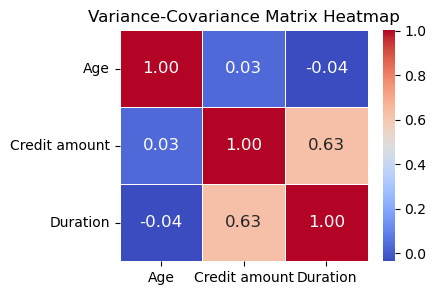

In [90]:
# Compute the variance-covariance matrix
gcr_cov = gcr_num_stand.cov()
# Display the covariance matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(gcr_cov, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
plt.title("Variance-Covariance Matrix Heatmap")
plt.show()

**Step 2: Computing eigenvalues and eigenvectors**

Eigenvectors and eigenvalues are used to estimate the principal components. To summarize, eigenvectors show the direction where the variance is highest in the dataset, while eigenvalues help to assess how much variation exists along that direction. High eigenvalues are thus associated with meaningful directions and principal components. Further information on how eigenvectors and eigenvalues are applied can be found [here](https://medium.com/@dareyadewumi650/understanding-the-role-of-eigenvectors-and-eigenvalues-in-pca-dimensionality-reduction-10186dad0c5c ) while the linear algebra is discussed [here](https://math.mit.edu/~gs/linearalgebra/ila5/linearalgebra5_6-1.pdf).

**Step 2.1: Methodology for PCA on observations**

The principal component analysis can be implemented either to variables or observations. In this subsection, the application is performed to observations. In such case, the eigenvectors $\mathbf{v}_k$ and eigenvalues $\lambda_k$, *k=1, ..., n*,  associated to $X^TX$ must be calculated.

$$ (X^T X) \mathbf{v}_k = \lambda_k \mathbf{v}_k$$

The eigenvectors associated with the biggest *m* eigenvalues are then selected. Below, function ```linalg.eig()``` from ```numpy``` is used to decompose the matrix. Further documentation is available [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).

In [91]:
# Find the transposed matrix
gcr_num_stand_T = gcr_num_stand.T

# Calculate X^T X
product = np.dot(gcr_num_stand_T, gcr_num_stand)

# Compute the eigenvalues and eigenvectors associated to X_transposed * X
eigenvalues, eigenvectors = np.linalg.eig(product)

# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

Since each eigenvalue is equal to the variance of the corresponding principal component, the total explained variance is the sum of the first *m* eigenvalues. The ratio of this sum to the sum of all the *n* eigenvalues gives the percentage of variance explained by the new matrix. As seen in the theoretical session, this can be expressed using the following formula:

$$ \tau_m = \frac{\lambda_1 + ... + \lambda_m}{\lambda_1 + ... + \lambda_n}$$

In [92]:
# Calculate explained variance
total_variance = np.sum(eigenvalues)
explained_variance_1 = (np.sum(eigenvalues[:1])) / total_variance
explained_variance_2 = (np.sum(eigenvalues[:2])) / total_variance
print(f"The percentage of explained variance with 1 principal component is: {np.round(explained_variance_1 * 100, 2)}%")
print(f"The percentage of explained variance with 2 principal components is: {np.round(explained_variance_2 * 100, 2)}%")

The percentage of explained variance with 1 principal component is: 54.17%
The percentage of explained variance with 2 principal components is: 87.63%


**Step 2.2: Methodology for PCA on variables**

In this subsection, PCA is applied to variables. In such case, the eigenvectors $\mathbf{u}_k$ and eigenvalues $\xi_k$, k=1, ..., p,  associated with $XX^T$ need to be calculated.

$$ (XX^T) \mathbf{u}_k = \xi_k \mathbf{u}_k$$

The eigenvectors associated to the biggest *q* eigenvalues are then selected.

In [93]:
# Compute the transposed matrix
gcr_num_stand_T = gcr_num_stand.T
# Cumpute XX^T
product_var = np.dot(gcr_num_stand, gcr_num_stand_T)
# Compute the eigenvalues and eigenvectors associated to XX^T
eigenvalues_var, eigenvectors_var = np.linalg.eig(product_var)
# Sort the eigenvalues and corresponding eigenvectors
sorted_indices_var = np.argsort(eigenvalues_var)[::-1]
eigenvalues_var = eigenvalues_var[sorted_indices_var].real
eigenvectors_var = eigenvectors_var[:, sorted_indices_var].real

**Step 3: Selection of the principal components and projection of data**
<br/>
**Step 3.1: Selection of the principal components and projection of data, PCA on observations**
<br/>
The projection of rows on the $k^{th}$ axis is $z_k = X \mathbf{v}_k$ , where $\mathbf{v}_k$ is the $k^{th}$
 principal component. Below, this is calculated for the first 3 components.

In [94]:
# Select the top m components. Below m = 3
components = eigenvectors[:, :3]
# Projection of data
print(np.dot(gcr_num_stand, components))

[[-1.411988    2.77956345  0.13302905]
 [ 2.26608097 -1.24994149 -0.82370898]
 [-0.82149167  1.19418517  0.13585005]
 ...
 [-1.14149854  0.20334708 -0.11225682]
 [ 1.06079119 -1.23278921 -1.68085501]
 [ 1.74378583 -0.82653293 -1.02569169]]



**Step 3.2: Selection of the principal components and projection of data, PCA on variables**
<br/>An analogous process can be undertaken with eigenvectors found in step 2.2.

In [95]:
# Select the top q components, with q = 3
components_var = eigenvectors_var[:, :3]
# Projection of data
np.dot(gcr_num_stand_T, components_var).real

array([[  0.15644886, -31.58738388,   1.48751582],
       [-28.4998055 ,  -1.81648823, -13.58165884],
       [-28.50842321,   1.64259352,  13.5857165 ]])

## 3.2. Implementation with Python <a name="python_PCA"></a>

The same operation performed above can be quickly executed using function ```PCA``` from package ```sklearn```. More information on such function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).


In [96]:
# Standardize X
gcr_num_stand_py=StandardScaler().fit_transform(gcr_num)
# PCA
pca_X = PCA(n_components=3).fit_transform(gcr_num_stand_py)
print(pca_X)

[[-1.411988    2.77956345 -0.13302905]
 [ 2.26608097 -1.24994149  0.82370898]
 [-0.82149167  1.19418517 -0.13585005]
 ...
 [-1.14149854  0.20334708  0.11225682]
 [ 1.06079119 -1.23278921  1.68085501]
 [ 1.74378583 -0.82653293  1.02569169]]


Results are equivalent to the output from the manual process focusing on rows.
<br/>The graph below highlights that the new components are uncorrelated:

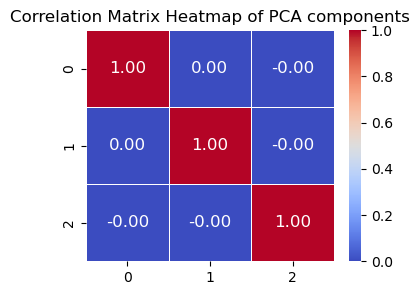

In [97]:
# Compute the correlation matrix
cov_matrix = np.corrcoef(pca_X, rowvar=False)
# Display the correlation matrix as a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12})
plt.title("Correlation Matrix Heatmap of PCA components")
plt.show()

Below, a 3-dimensional graph showing the three principal components is displayed:

In [98]:
# Prepare data
xdata = pca_X[:, 0]
ydata = pca_X[:, 1]
zdata = pca_X[:, 2]

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=xdata,
    y=ydata,
    z=zdata,
    mode='markers',
    marker=dict(
        size=5,
        color=zdata,  # Color by zdata
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Update layout
fig.update_layout(
    title='3D Scatter of PCA',
    scene=dict(
        xaxis_title='1st component',
        yaxis_title='2nd component',
        zaxis_title='3rd component',
        xaxis=dict(tickmode='linear', tick0=-2, dtick=1),
        yaxis=dict(tickmode='linear', tick0=-2, dtick=1),
        zaxis=dict(tickmode='linear', tick0=-2, dtick=1)
    )
)

# Show plot
fig.show()


In [99]:
# # Prepare 3D graph
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# # Plot scaled features
# xdata = pca_X[:,0]
# ydata = pca_X[:,1]
# zdata = pca_X[:,2]

# # Plot 3D plot
# ax.scatter3D(xdata, ydata, zdata, c=zdata)

# # Plot title of graph
# plt.title(f'3D Scatter of PCA')
# plt.xlabel('1st component')
# plt.ylabel('2nd component')

# # Plot x, y, z even ticks
# ticks = np.linspace(-2,2, num=5)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_zticks(ticks)

# # Show plot
# plt.show()

# 3.3. Principal Components Regression (PCR)  <a name="PCR"></a>

PCA can be implemented as a preliminary step to a linear regression, for instance. As mentioned, performing a PCA helps to avoid collinearity among explanatory variables by creating new uncorrelated variables. These new variables can then be used to perform a supervised learning method. In Python, this is done by first selecting the explanatory and dependent variables. Then, PCA is applied to the explanatory variables. Finally, the linear regression is performed using the principal components. Below, the *Ames housing* dataset, used in a previous session to perform a linear regression, is employed again. Numerical variables are chosen as explanatory variables. PCA is applied, and a regression to predict *SalePrice* is performed.

In [100]:
# Determine dependent and explanatory variables
x_pcr = ames_data.select_dtypes(include=['number']).astype('float64').drop('SalePrice', axis=1)
y_pcr = ames_data['SalePrice']

# Apply PCA on the explanatory variables dataset
x_pcr_stand = StandardScaler().fit_transform(x_pcr)
# PCA
x_pcr_pca = PCA(n_components=10).fit_transform(x_pcr_stand)

# Split the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(x_pcr_pca, y_pcr, test_size = 0.3, random_state = 12)

# Perform the linear regression
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Make predictions
y_pred = model.predict(X_test)
R2_test_set = r2_score(y_test, y_pred)
print(f"The R-squared on the test-dataset is: {round(R2_test_set, 3)}")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     855.9
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        08:42:26   Log-Likelihood:                -24342.
No. Observations:                2051   AIC:                         4.871e+04
Df Residuals:                    2040   BIC:                         4.877e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.806e+05    764.744    236.194      0.0

Compared to the linear regression model from the fourth session, the model above shows a similar R-squared and a lower AIC. However, it is good to bear in mind that it relies on more variables.

# 4. K-means clustering<a name="K_means_clus"></a>
K-means clustering is a technique to subdivide a dataset into distinct, non-overlapping groups containing records with similar properties, such that they can be considered homogeneous. This partition is based on feature similarity. For numerical observations, the Euclidean distance is typically used.

Concretely, *n* centroids (centers of gravity of a cluster) are set up to divide the dataframe into *n* groups. Each observation is assigned to the closest cluster. Afterwards, centroids will be redefined to minimize within-cluster sum of squares (also called intraclass inertia in the theoretical session).

<ins>**Overview of a K-means clustering algorithm:**</ins>
1. The coordinates of centroids are assigned
2. Each observation is assigned to the closest centroid
3. Centroids are recalculated to minimize intraclass inertia

The process continues until either the maximun number of iterations is reached or the clusters converge to a local optimum. Below, the algorithm is implemented first step-by-step and then with a Python function. Here, centroids will be calculated as averages, so only numerical variables from the dataset are used. To begin, the number of clusters is set to 2, so that the dataset is split into two groups showing potentially different behaviour. This choice can be adjusted as needed.

## 4.1. Step-by-step K-means clustering <a name="k_means_prac"></a>
**Step 1: Initialization of centroids**
<br/>The first centroids are randomly found using a uniform distribution.

In [101]:
# Choice of number of clusters
n_clusters = 2
# Assigment of centroids with the uniform distribution
centroid_min, centroid_max = np.min(gcr_num, axis=0), np.max(gcr_num, axis=0)
centroids = [np.random.uniform(centroid_min, centroid_max) for i in range(n_clusters)]

**Step 2: Assigment of observations to the closest centroid**
<br/>For all the observations in the dataset, the Euclidean distance from each centroid is calculated. Each observation is subsequently assigned to the cluster to which the nearest centroid belongs. The Euclidean distance between points $x = (x_1, ..., x_n)$ and $c_u = (c^u_1, ..., c^u_n)$ is defined as:

$$d(x,c^u) = \sqrt{\sum^n_{i=1}(x_i - c^u_i)^2}$$

Below, function ```euclidean``` from ```scipy``` computes the aforementioned distance.

In [102]:
# Calculation of distance and assigment to the closest centroid
sorted_points = [[] for i in range(n_clusters)]
for j in range(len(gcr_num)):
  x = gcr_num.iloc[j]
  # Computation of distance compared to all centroids
  dists = [euclidean(x, c) for c in centroids]
  # function argmin returns the indice of the minimum value
  centroid_idx = np.argmin(dists)
  # The observation is now assigned to the closest centroid
  sorted_points[centroid_idx].append(x)
# Discard empty elements
sorted_points = [element for element in sorted_points if element]

The cluster $S_u$, with u = 1, ..., n_clusters, contains the closest objects to $c_u$:

$$ S_u = \{ x_j : d(x_j, c_u) \leq d(x_j, c_m)\}, \space \space \space \space m = 1, ..., \text{n clusters} \space \space \text{and} \space j = 1, ..., n$$

**Step 3: Recalculation of centroids and iteration**
<br/>Below, centroids are calculated again as the mean of observations belonging to each group:

In [103]:
centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]

Observations are assigned again  on the basis of the distance from the new centroids.

In [104]:
sorted_points = [[] for j in range(n_clusters)]
for k in range(len(gcr_num)):
  x = gcr_num.iloc[k]
  # Computation of distance compared to all centroids
  dists = [euclidean(x, c) for c in centroids]
  # function argmin returns the indice of the minimum value
  centroid_idx = np.argmin(dists)
  # The observation is now assigned to the closest centroid
  sorted_points[centroid_idx].append(x)
# Discard empty elements
sorted_points = [element for element in sorted_points if element]

**Combining steps together**
<br/>The process can stop once clusters stabilize or after a specified number of iterations is reached. This can be implemented using a ```while``` loop. All previous steps can be combined, including the stop condition.

In [105]:
def K_mean_clustering(dataframe, n_clusters, max_iter):
    iteration = 0
    centroid_min, centroid_max = np.min(dataframe, axis=0), np.max(dataframe, axis=0)

    # Initialize centroids randomly within the feature range
    centroids_sbs = [np.random.uniform(centroid_min, centroid_max) for l in range(n_clusters)]

    # Initialize prev_centroids with empty arrays of the same shape as centroids
    prev_centroids = [np.empty(centroids_sbs[0].shape) for m in range(n_clusters)]

    while np.any(np.not_equal(centroids_sbs, prev_centroids)) and iteration < max_iter:
        prev_centroids = centroids_sbs.copy()  # Update prev_centroids

        # Create empty lists to hold sorted points for each cluster
        sorted_points = [[] for n in range(n_clusters)]

        for i in range(len(dataframe)):
            x = dataframe.iloc[i].to_numpy()  # Convert the point to a numpy array
            dists = [euclidean(x, c) for c in centroids_sbs]  # Calculate distances to centroids
            centroid_idx = np.argmin(dists)  # Find the closest centroid
            sorted_points[centroid_idx].append(x)  # Assign point to corresponding cluster

        # Discard empty clusters (although this may not happen if clusters are well distributed)
        sorted_points = [cluster for cluster in sorted_points if len(cluster) > 0]

        # Update centroids as the mean of the points in each cluster
        centroids_sbs = [np.mean(cluster, axis=0) for cluster in sorted_points]

        iteration += 1

    return centroids_sbs, sorted_points, iteration

The function is called below with 2 centroids and maximum 100 iterations. It returns the list of centroids and the clusters.

In [109]:
centroids_sbs, sorted_points, iteration = K_mean_clustering(gcr_num.copy(), 2, 100)
print("Converged or stopped at iteration: " + str(iteration))

Converged or stopped at iteration: 6


A graphical representation of clusters is plotted below. For the scatterplot, two variables are chosen: *Credit Amount* and *Duration*. Osbervations belonging to different clusters take different colors and centroids are plotted using an X.

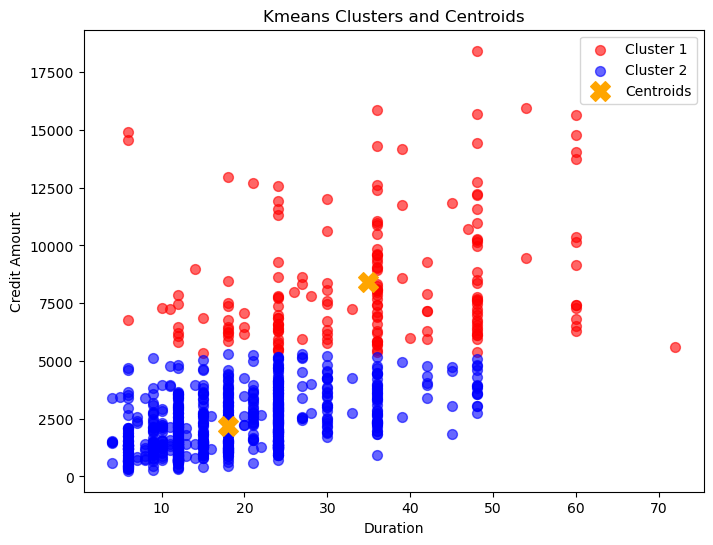

In [110]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

# Define a list of colors (you can use a colormap if you have more than 10 clusters)
colors = ['red', 'blue']

# Plot each cluster's points with a different color
for i, cluster in enumerate(sorted_points):
  cluster_array = np.array(cluster)
  plt.scatter(cluster_array[:, -1], cluster_array[:, -2],
  label=f'Cluster {i + 1}',
  color=colors[i % len(colors)], s=50, alpha=0.6)  # s=50 for point size

# Plot centroids on top of the clusters
centroids_array = np.array(centroids_sbs)
plt.scatter(centroids_array[:, -1], centroids_array[:, -2],
marker='X', s=200, c='orange', label='Centroids')

plt.title('Kmeans Clusters and Centroids')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.legend()
plt.show()

## 4.2. K-means++ algorithm & implementation with Python<a name="python_k_means"></a>

The same operation performed above can be efficiently executed using function ```KMeans``` from package ```sklearn```. More information on this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). For this function, the user can set ```init="random"``` or ```init="k-means++"```. In the second case, the initial centroids are specified as follows:

<ins>**K-means++ algorithm:**</ins>

1. The first centroid is specified randomly
2. The distance is calculated between this centroid and all observations
3. The next initial centroids are determined iteratively. An observation is selected randomly as new centroid based on the empirical probability distribution for the points, which is given by:

$$\frac{d^2(x_i, c_{j-1}(0))}{\sum_{i=1}^{n} d^2(x_i, c_{j-1}(0))} \space \space \space \space \space i=1, ..., n$$

Observations further away from the previous centroid will get heavier weights than closer ones. This algorithm helps to get well-scattered initial centroids. Afterwards, the regular K-means algorithm is applied.

In case ```init="random"``` is used, initial centroids are chosen randomly from the observations. Since the K-means clustering algorithm does not guarantee to find a global optimum, running it again may lead to finding different centroids.

In [117]:
# Choice of number of clusters
n_clus = 3
# Get a copy of the data to do clustering on
gcr_num_tmp = gcr_num.copy()
# Use of KMeans function
km = KMeans(init="random", n_clusters=n_clus, n_init=20, max_iter = 300)
# Fit the model to the data
km.fit(gcr_num_tmp)
# Extract centroids and labels
centroids = km.cluster_centers_
labels = km.labels_
# Add cluster labels to the data
gcr_num_tmp['Cluster'] = labels

A similar graphical representation is shown here. The number of clusters is chosen to be *k* = 3.

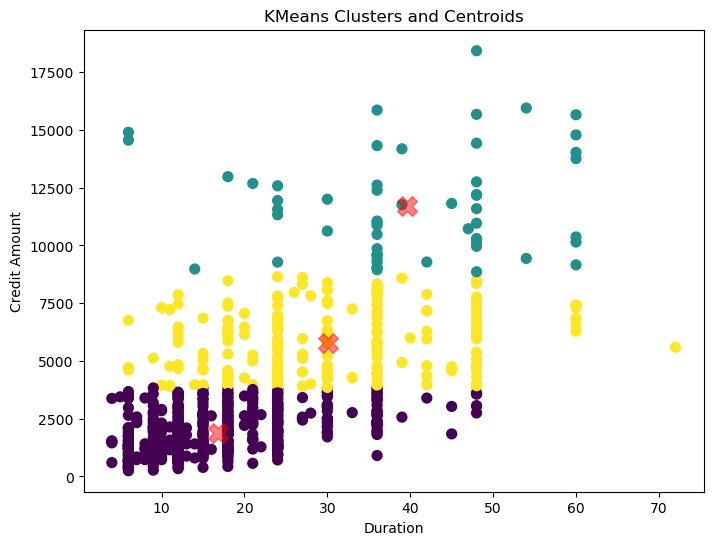

In [118]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot the data points and their cluster labels
plt.scatter(gcr_num_tmp.iloc[:, -2] , gcr_num_tmp.iloc[:, -3] , c=labels, s=50)

# Plot the centroids
plt.scatter(centroids[:, -2], centroids[:, -3], c='red', s=200, alpha=0.5, marker='X')

plt.title('KMeans Clusters and Centroids')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()

## 4.3. Determining the optimal number of clusters <a name="optimal_k"></a>

In the previous algorithms, the user had to choose the number of clusters. There are several methodologies that can be adopted to make such choice. Below, three of them are illustrated:

1. Elbow method
2. Optimization of the silhouette coefficient
3. Gap statistic

### The elbow method
<br/> As seen in the theoretical session, the intra-class inertia is defined as:

$$  I_a = \frac{1}{n} \sum_{k=1}^{X} \sum_{x_i \in S_u} d(x_i, g_u)^2  $$

This function decreases with the number of clusters *k*. However, the reduction rate is not constant: after a certain value of *k*, it usually decreases less rapidly. Plotting the intra-class inertia vs the number of clusters *k* can highlight the points (or elbows) where the inertia starts decreasing less rapidly. Below, the attribute ```inertia_``` from the ```KMeans``` function is used to compute the inertia, which is then plotted against different values of *k*.

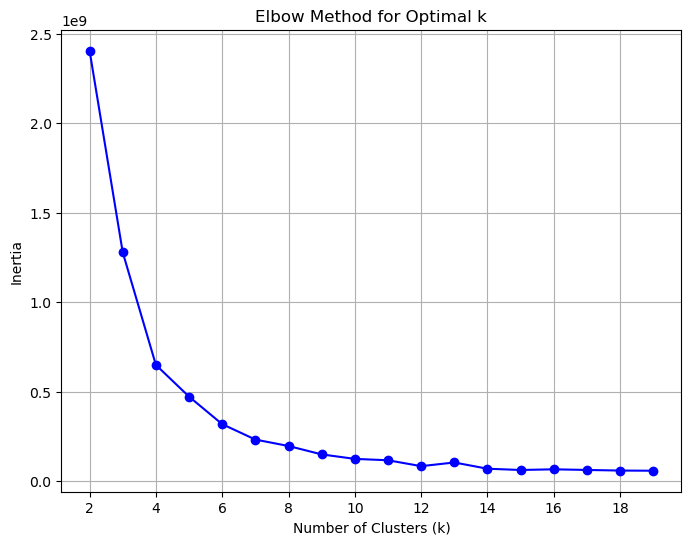

In [119]:
# 2. Perform K-means for a range of cluster k and save the attribute ineria
inertia = []
k_range = range(2, 20)  # Testing k values from 1 to 10

for k in k_range:
    km = KMeans(init="random", n_clusters=k, n_init=20, max_iter = 300)
    km.fit(gcr_num)
    inertia.append(km.inertia_)

# 3. Plot the Inertia vs. Number of Clusters (Elbow Method)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
# Set the x-axis to show only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

According to this method, *k* = 4 or *k* = 6 might be a potential candidate as optimal number of clusters.

### Silhouette coefficient
<br/>
The Silhouette score is another methodology to determine the optimal number of clusters. Mathematically, it is defined as:

$$ \text{Silhouette Score} = \frac{1}{n * p} \sum_{j=1}^{p} \sum_{i=1}^{n} \frac{b(x_{i, j}) - a(x_{i, j})}{\max(a(x_{i, j}), b(x_{i, j}))} $$

where $x_{i, j}$, with $i=1, ...,n$ and $j=1, ...,p$, is a datapoint belonging to cluster $S_u$ and $a(x_{i, j})$ and $b(x_{i, j})$ are defined as follows:

$$a(x_{i, j}) = \frac{1}{|S_u| - 1} \sum_{x_{k, m} \in S_u, x_{k, m} \neq x_{i, j}} \| x_{i, j} - x_{k, m} \|$$

In this equation, $a(x_{i, j})$ represents the average distance of observation $x_{i, j}$ from the other observations in the same cluster. On the other side, $b(x_{i, j})$ is defined as:

$$b(x_{i, j}) = \min_{S_v \neq S_u} \frac{1}{|S_v|} \sum_{x_{k, m} \in S_v} \| x_{i, j} - x_{k, m} \| $$

which is the average distance between the observation $x_{i, j}$ and the other observations in the nearest cluster to which $x_{i, j}$ does not belong to. It represents how well clusters are separated. In other words, the silhouette coefficient is a measure of how similar an object is to its own cluster, compared to other clusters. It ranges from -1 to 1, where:

- **1** indicates that the sample is far away from the neighboring clusters and very close to the cluster it is assigned to.
- **0** indicates that the sample is on, or very close to, the decision boundary between two neighboring clusters.
- **Negative values** indicate that those samples might have been assigned to the wrong cluster.

When interpreting the silhouette coefficient for a clustering solution, the followings are generally considered:

- **Average Silhouette coefficient**: The mean silhouette score of all samples. A higher average silhouette score indicates better-defined clusters.
- **Silhouette Plot**: Visual representation of the silhouette scores for each sample. It helps to see the distribution of scores within each cluster.

In summary, the silhouette score helps to evaluate the quality of a clustering solution. Higher scores indicate better-defined and well-separated clusters, while lower scores suggest that the clustering might need improvement. Such score can be computed with Python with ```silhouette_score``` from ```sklearn```. More information can be found
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Below, it is used in correspondence to different values of clusters *k*.

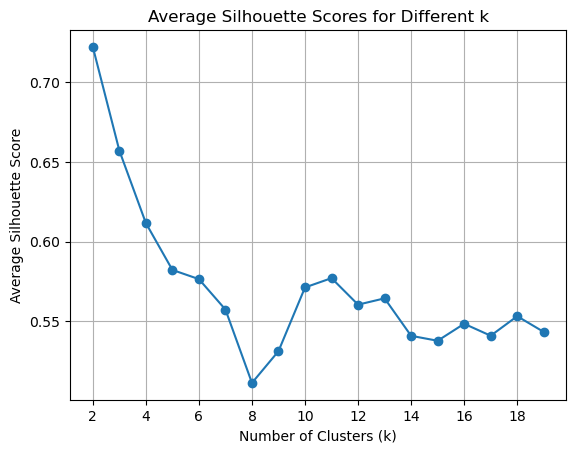

In [120]:
# Range of k values to test
k_range = range(2, 20)
silhouette_scores = []

# Loop over different values of k
for k in k_range:
    # Apply KMeans clustering
    kmeans = KMeans(init="random", n_clusters=k, n_init=20, max_iter = 300)
    kmeans.fit(gcr_num)

    # Calculate the silhouette score for the current clustering
    avg_score = silhouette_score(gcr_num, kmeans.labels_)
    silhouette_scores.append(avg_score)

# Plot the silhouette scores for different k values
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Average Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
# Set the x-axis to show only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

Below, the silhouette score is illustrated for different numbers of clusters using Python ```Silhouette Plot``` ([code source](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)).

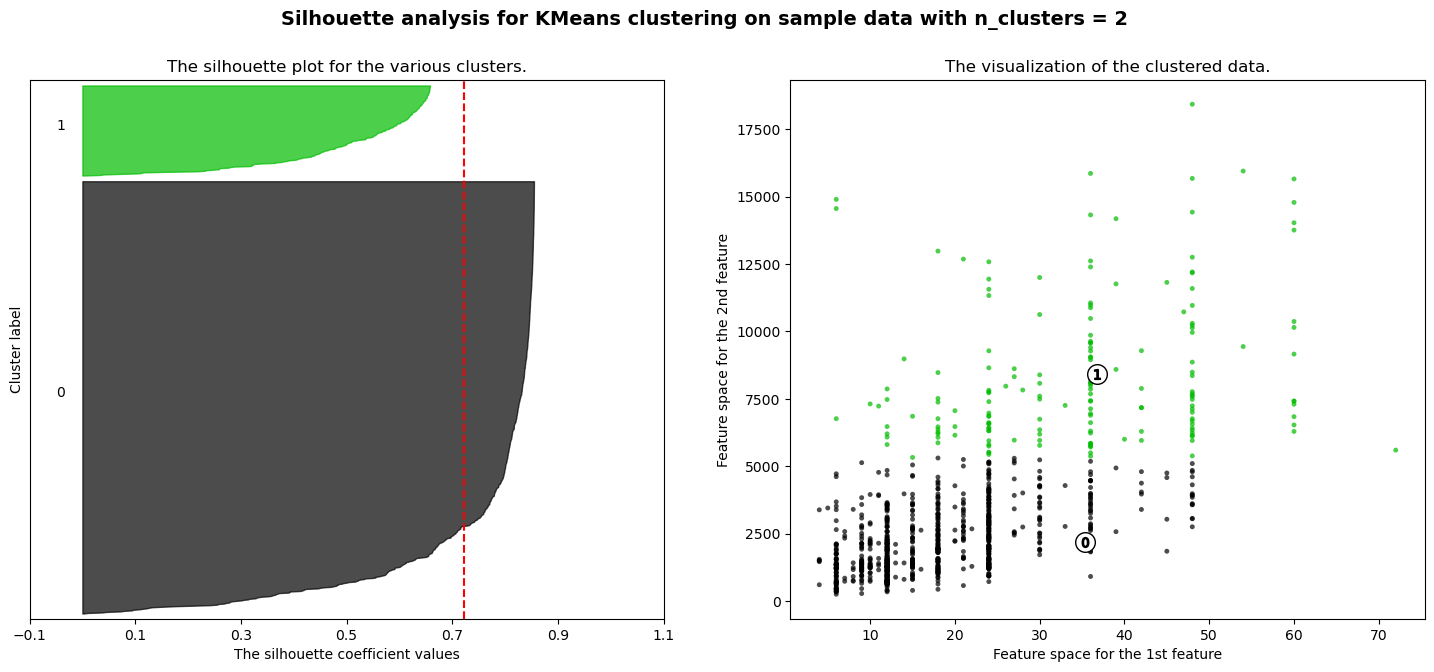

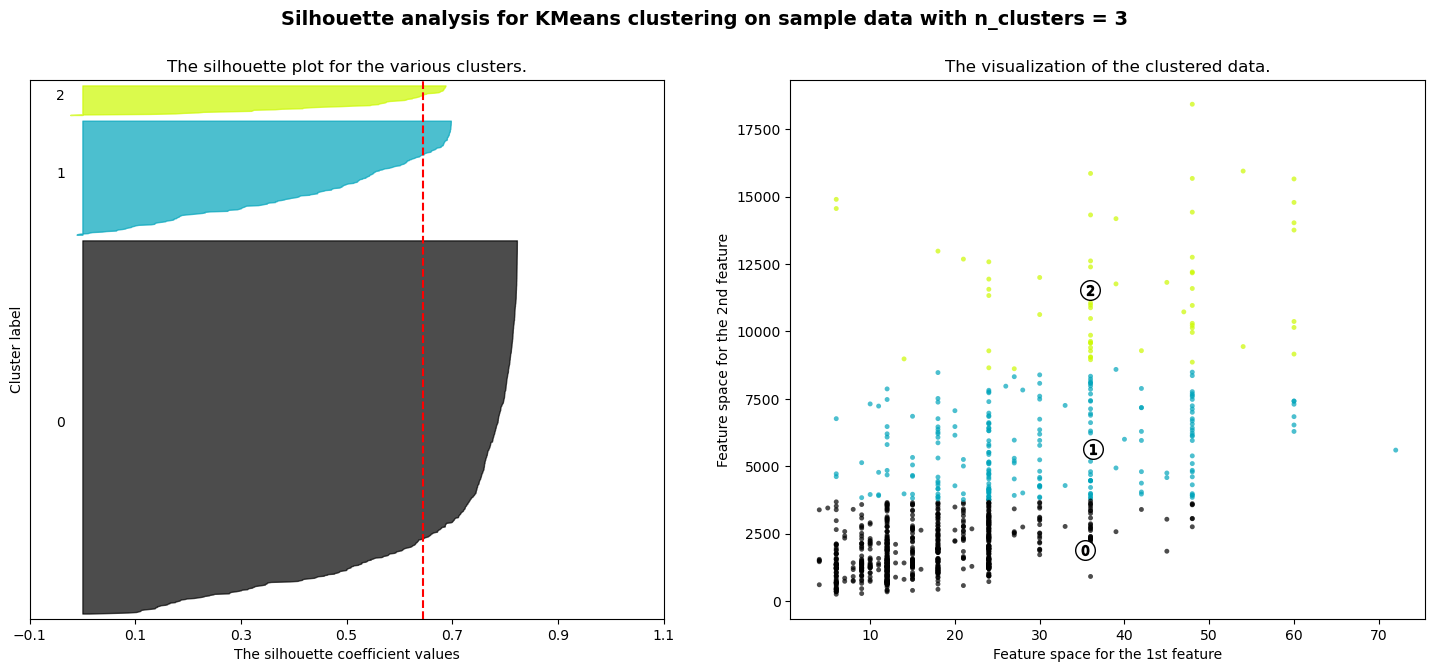

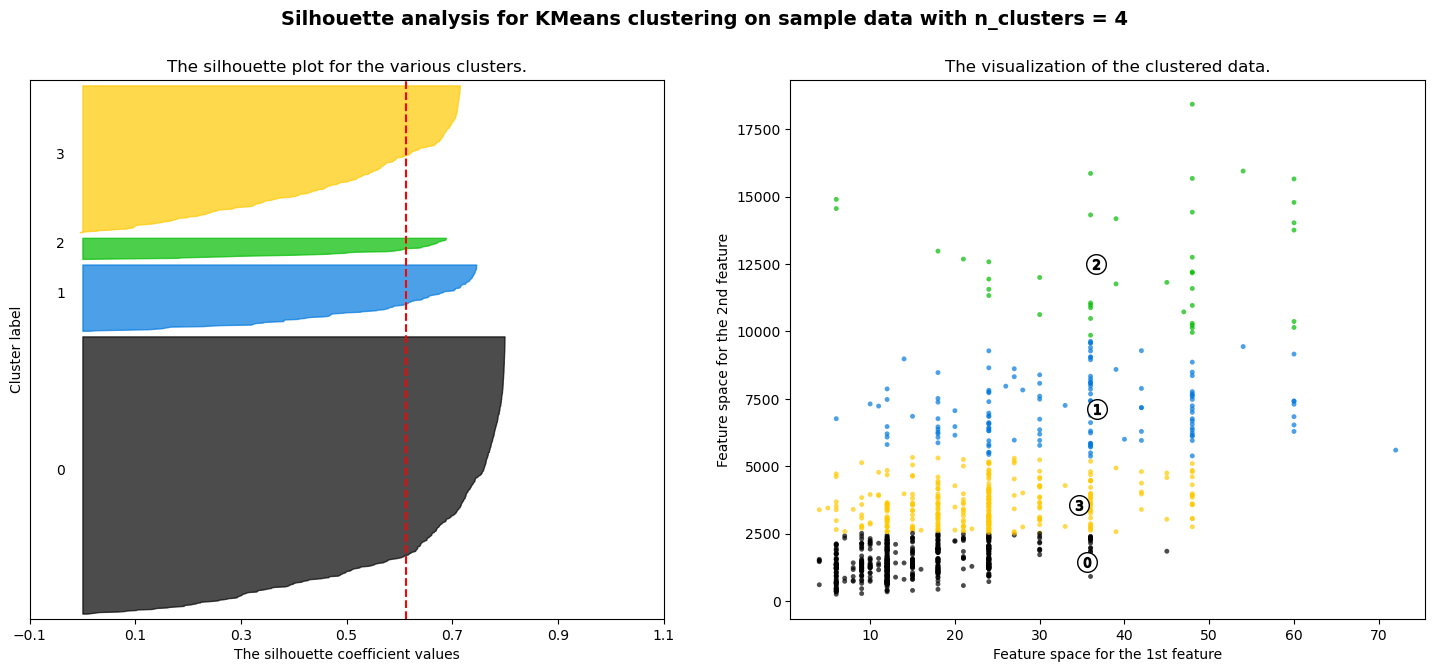

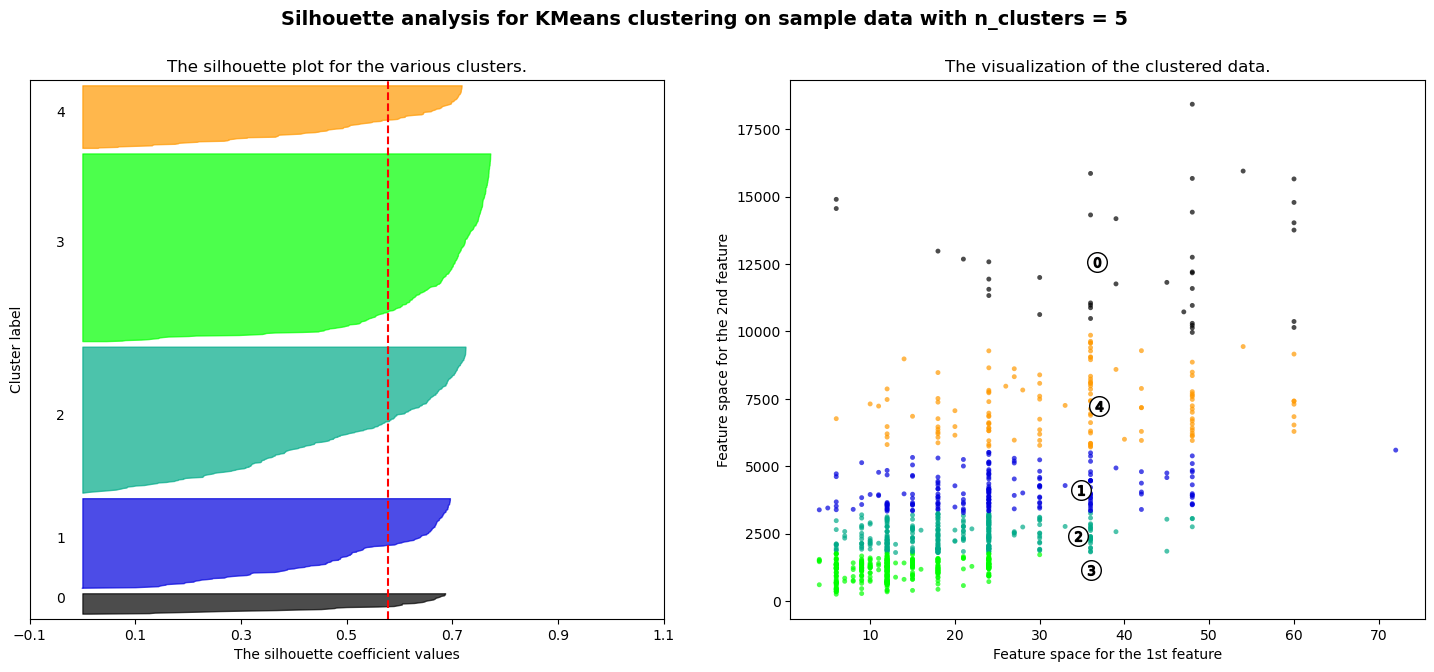

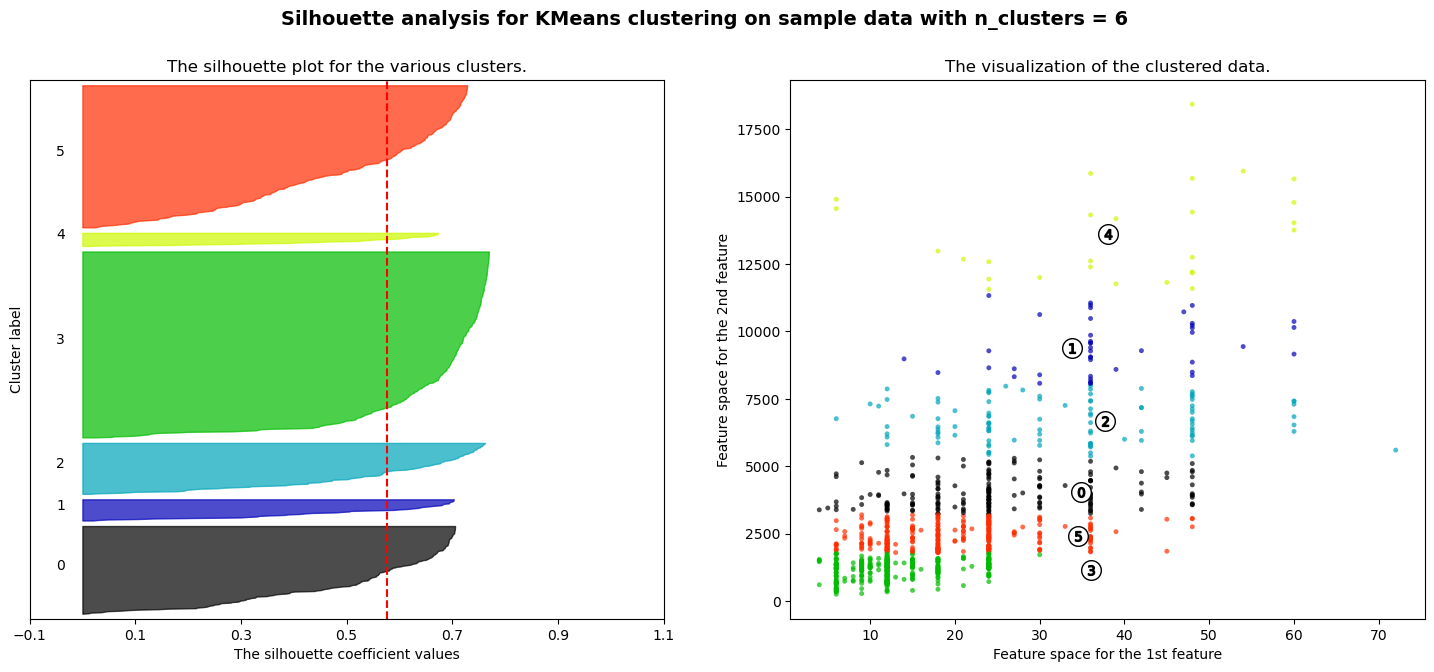

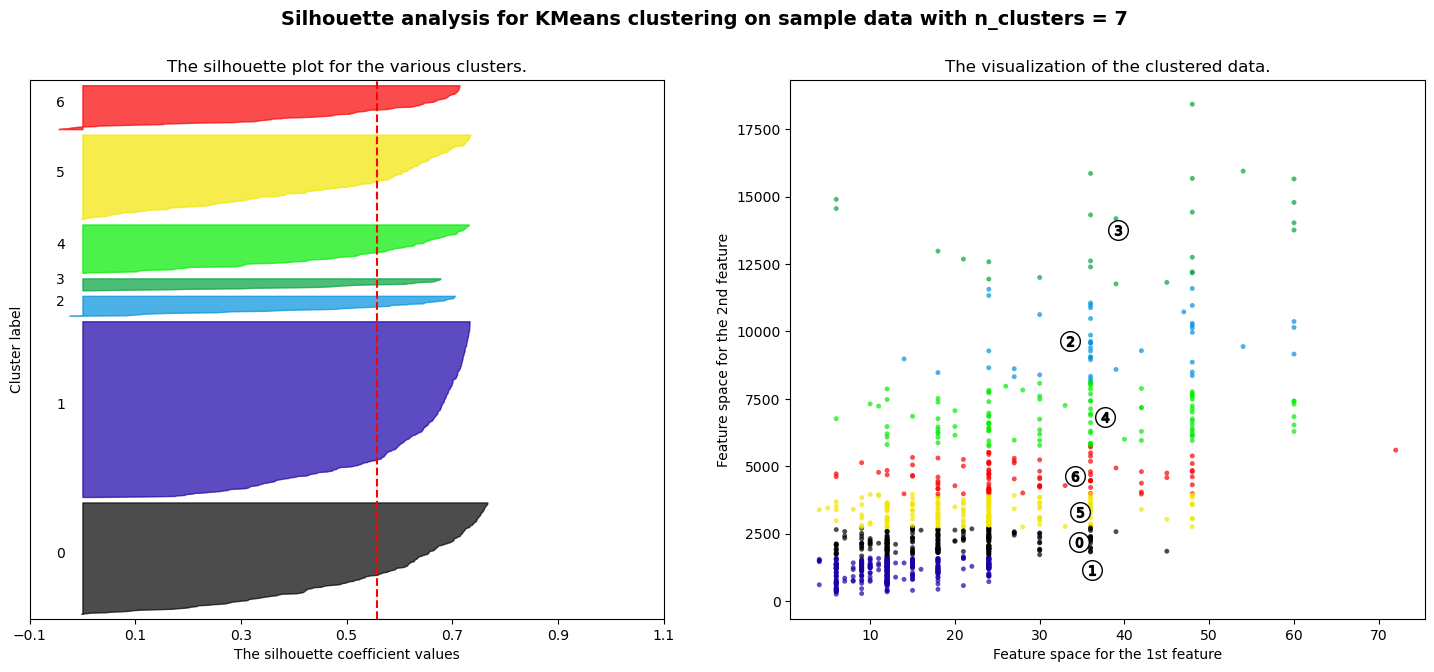

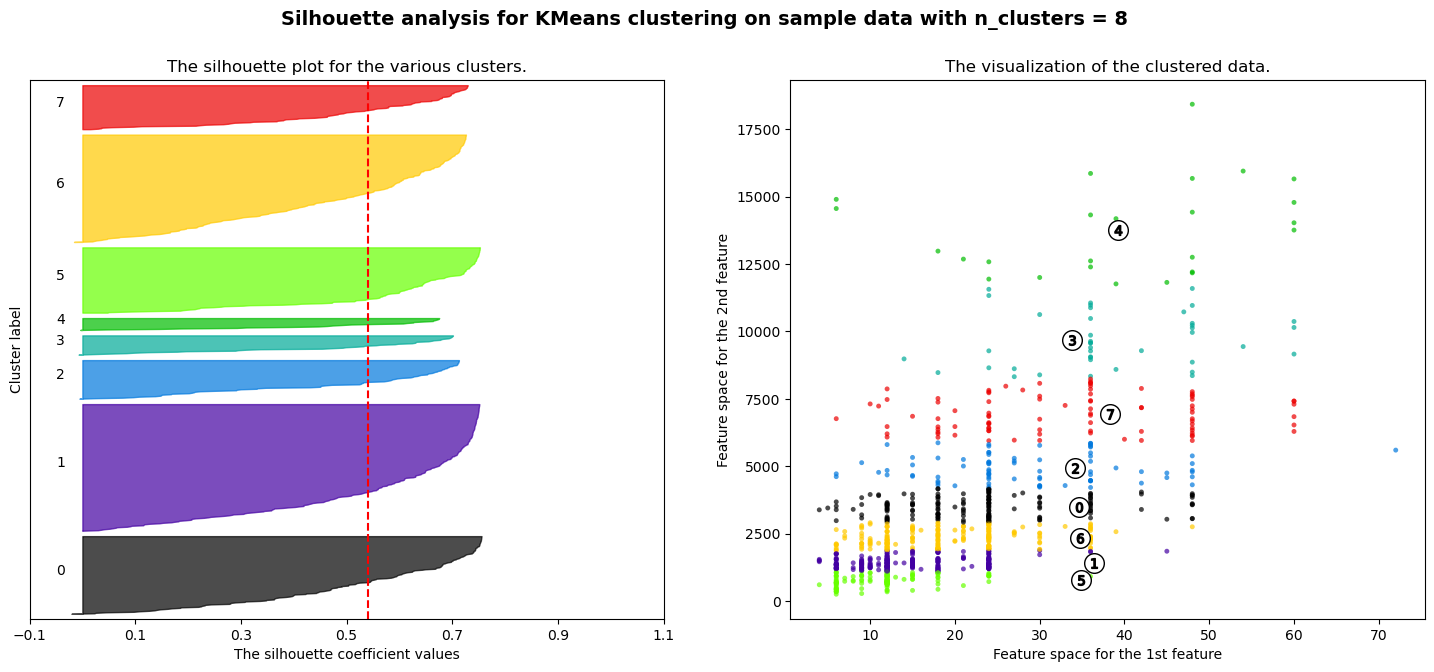

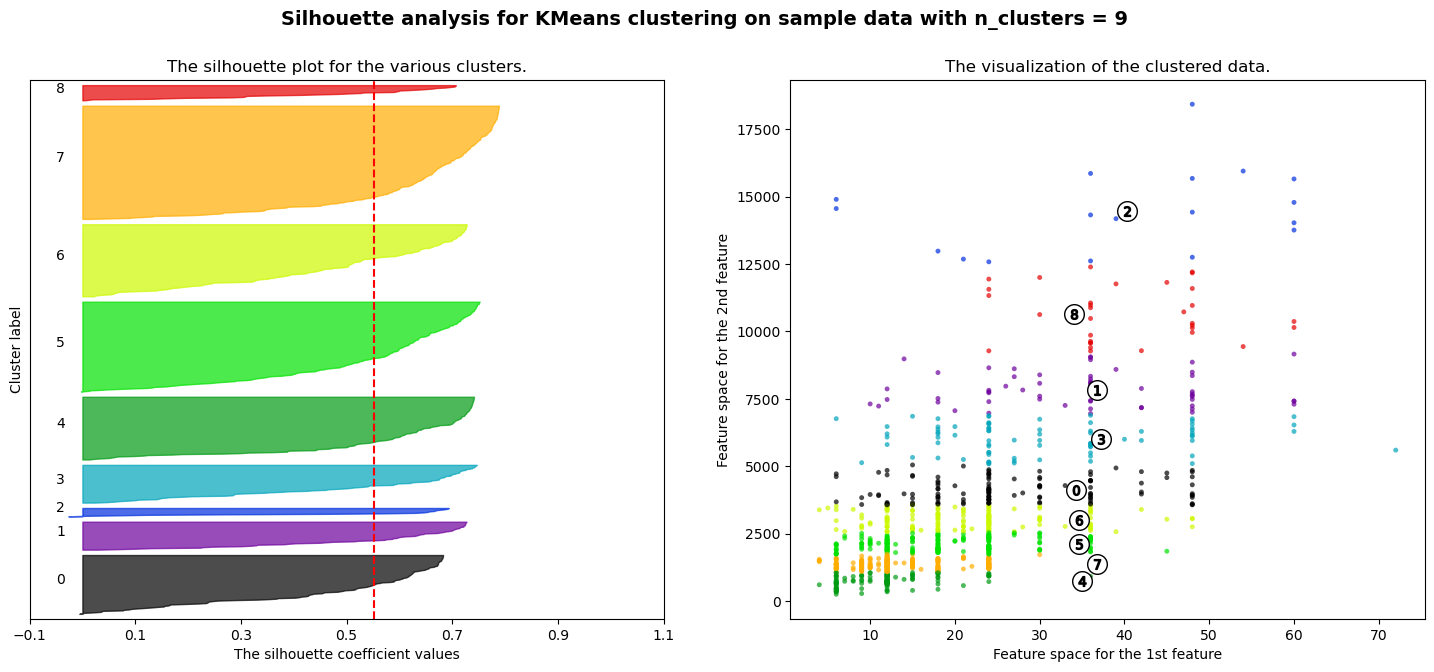

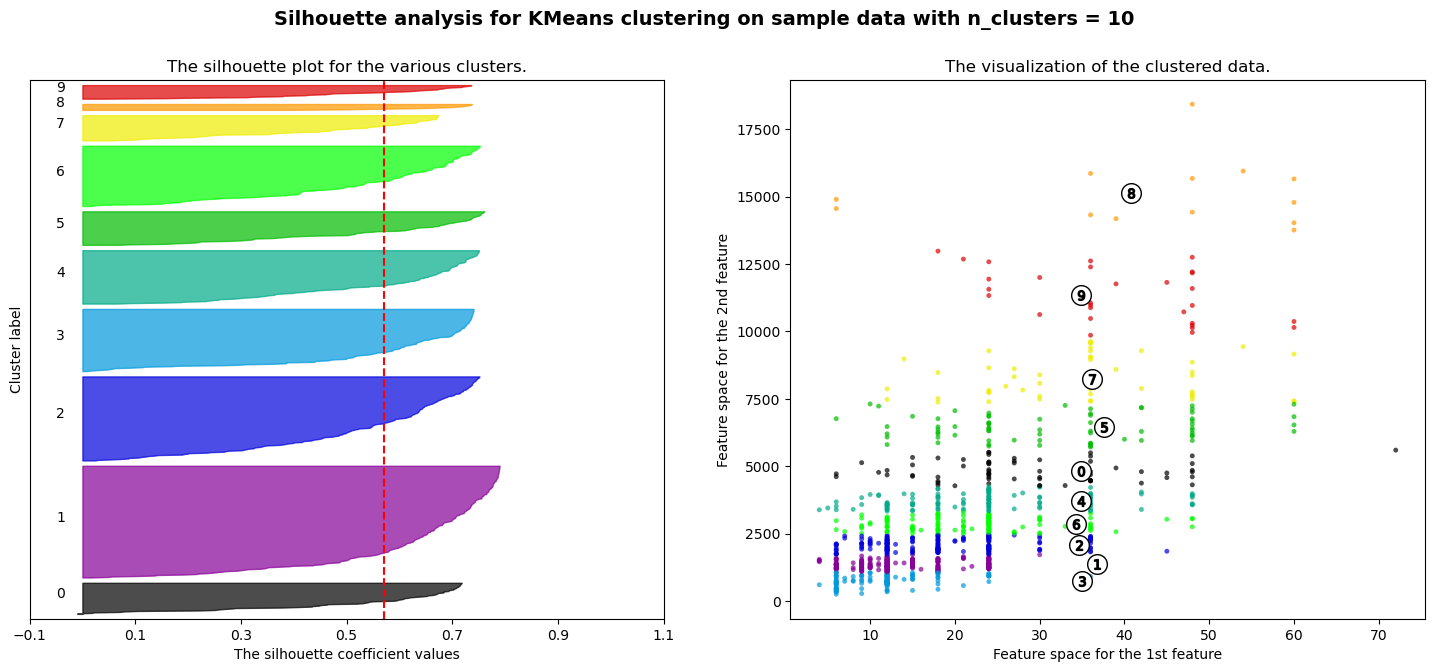

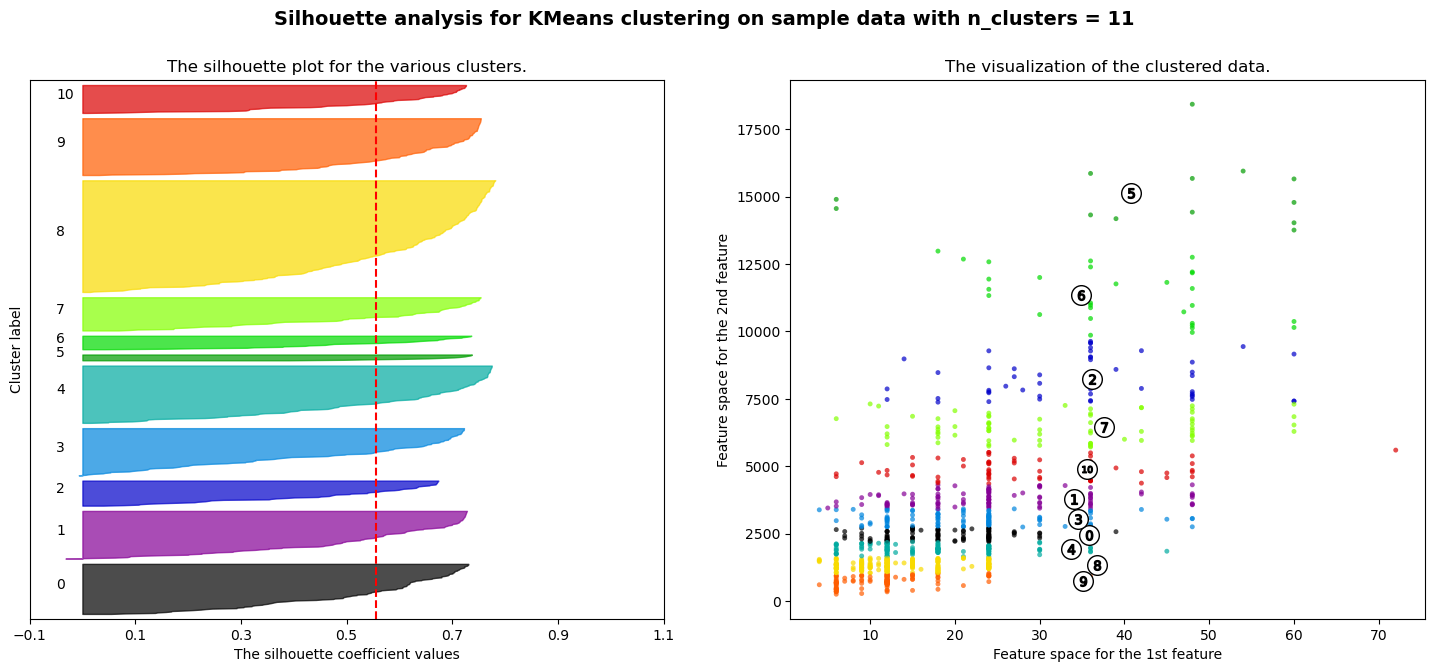

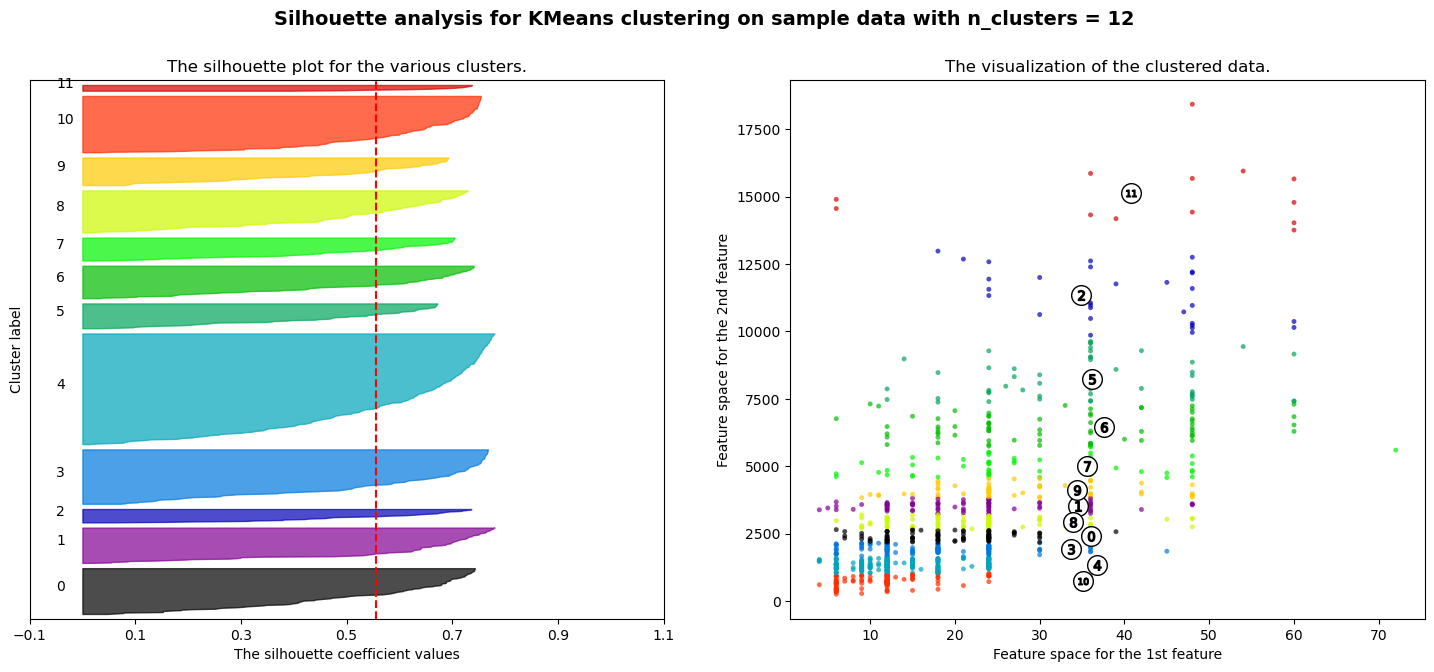

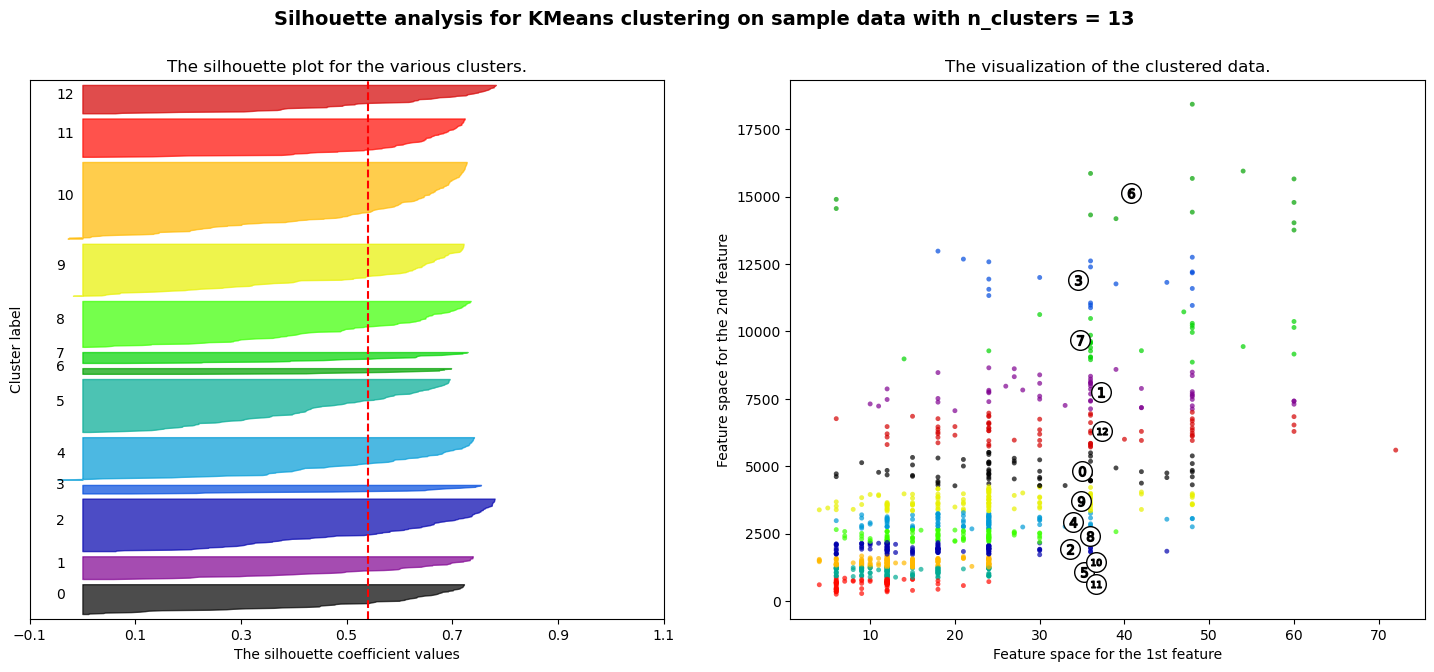

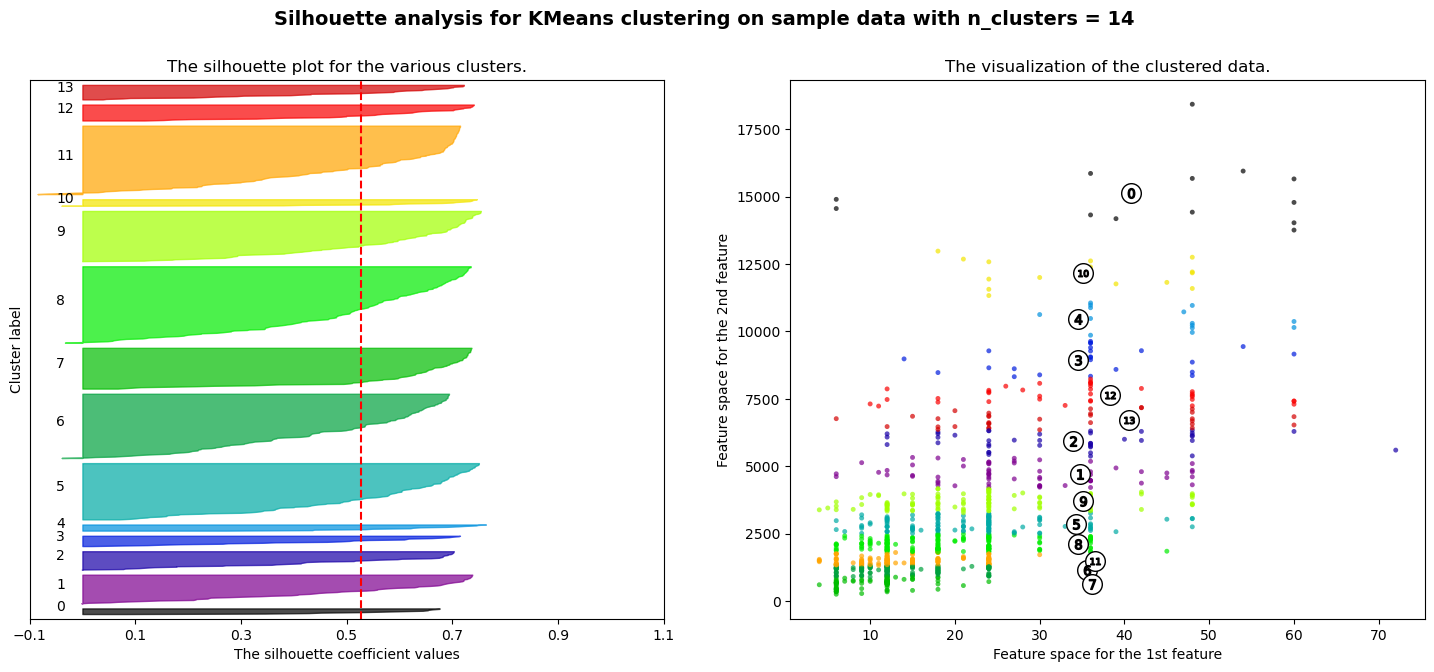

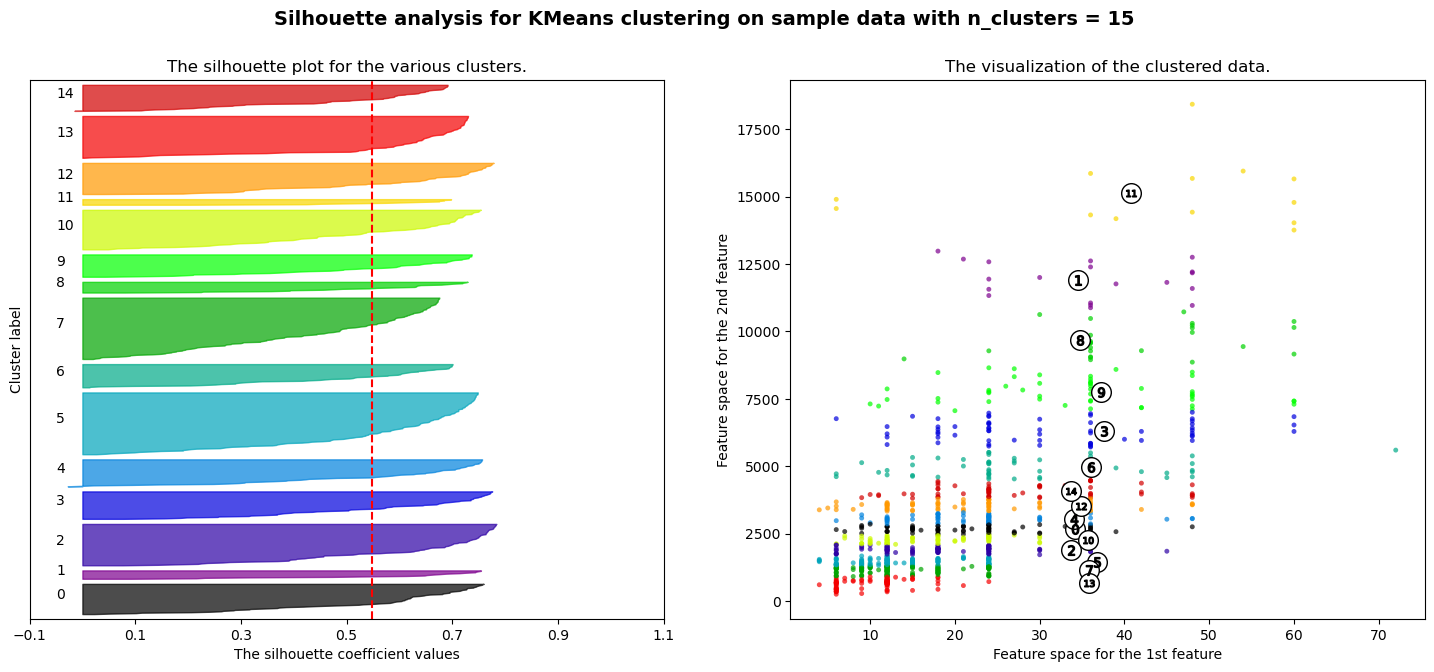

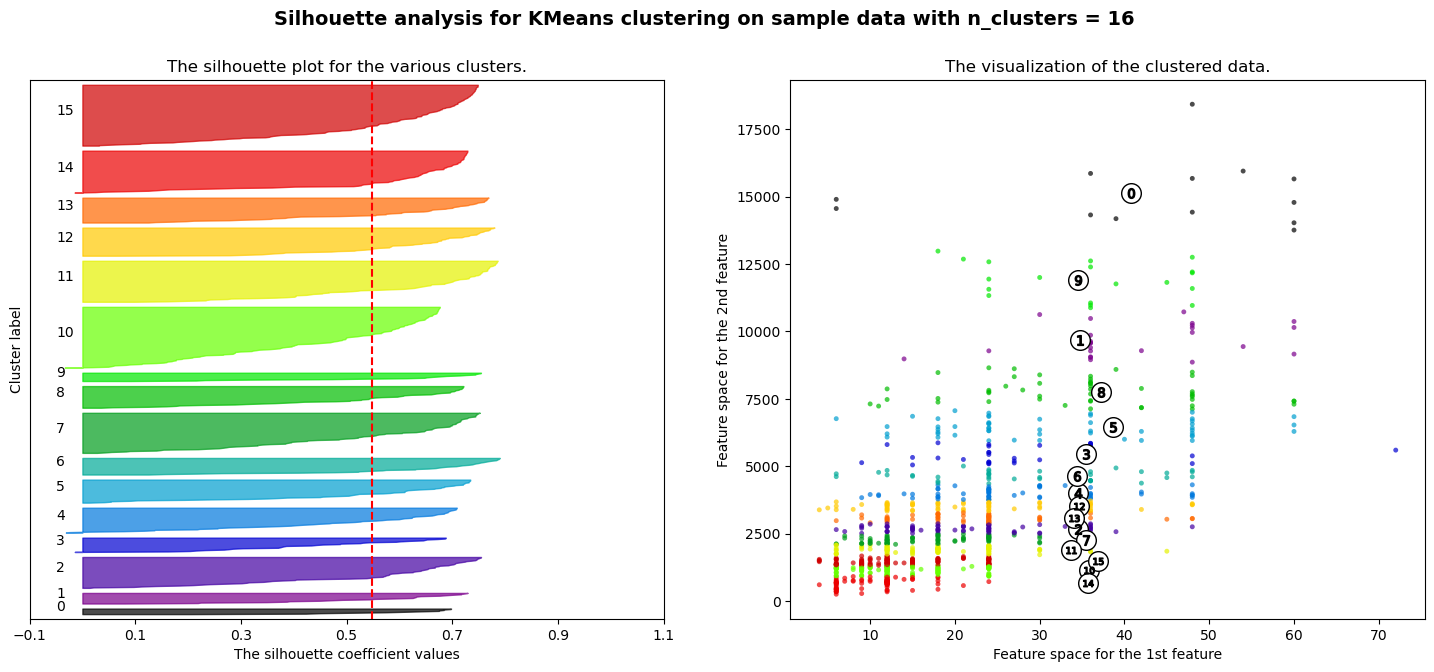

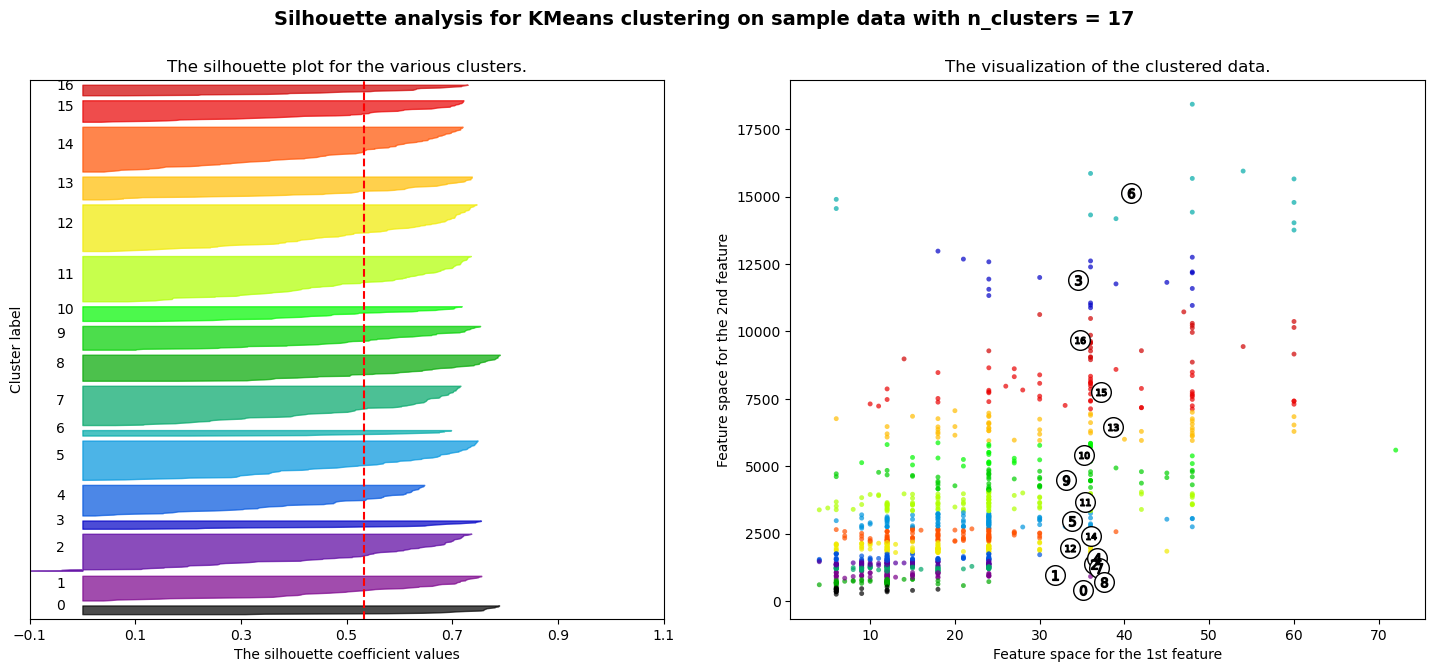

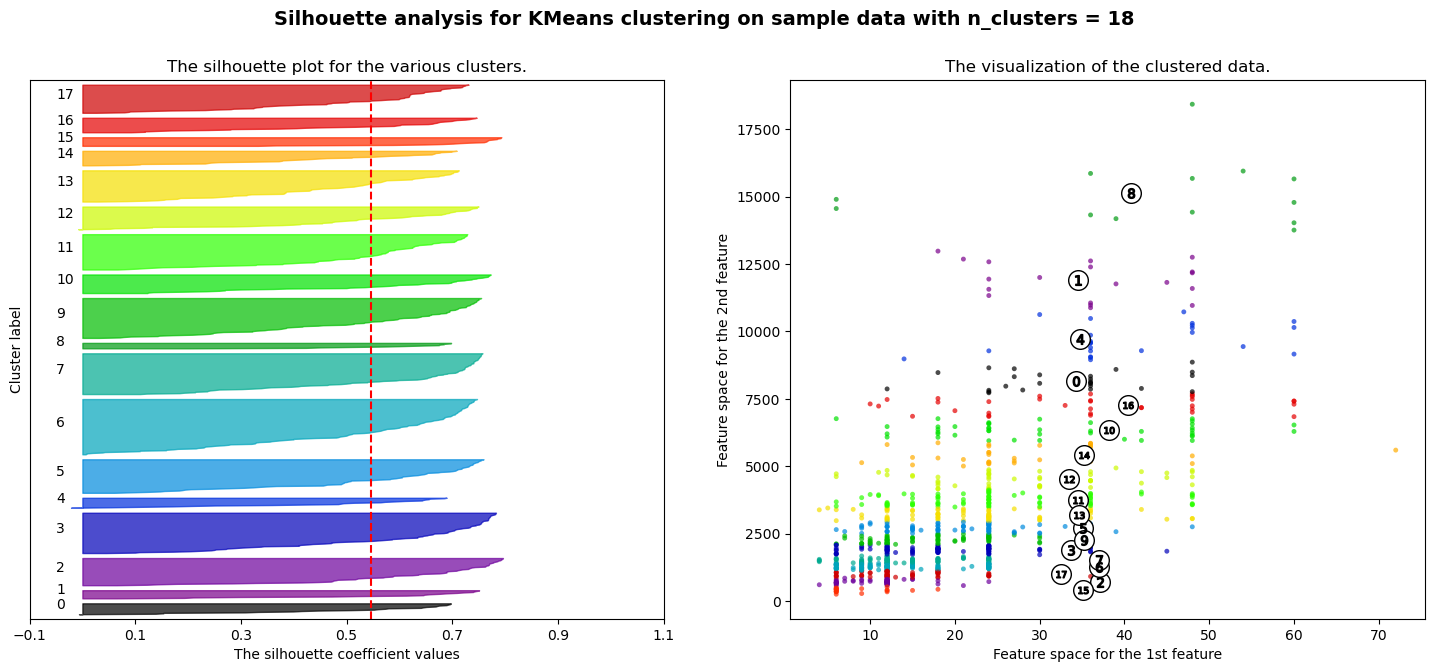

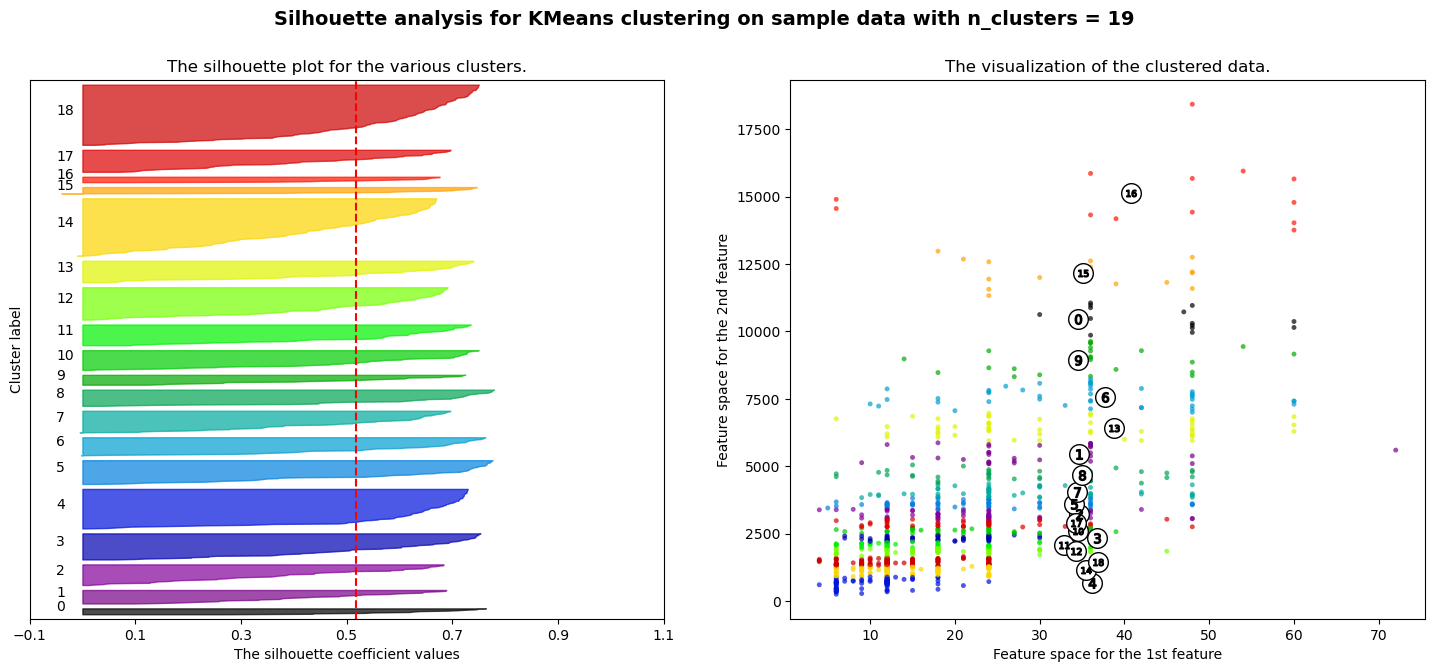

In [121]:
# Loop over different values of k
for k in k_range:
    # Apply KMeans clustering
    kmeans = KMeans(init="random", n_clusters=k, n_init=20, max_iter=300)
    kmeans.fit(gcr_num)

    # Calculate the silhouette score for the current clustering
    score = silhouette_score(gcr_num, kmeans.labels_)
    silhouette_scores.append(score)

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [0.5, 1]
    ax1.set_xlim([0.5, 1])
    # The (k+1)*10 is for inserting blank space between silhouette plots of individual clusters,
    # to demarcate them clearly.
    ax1.set_ylim([0, len(gcr_num) + (k + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(gcr_num, kmeans.labels_)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i,
        # and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(kmeans.labels_.astype(float) / k)
    ax2.scatter(gcr_num.iloc[:, -2], gcr_num.iloc[:, -3], marker='.', s=50, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

Since a higher average silhouette score indicates better-defined cluster, the graphs above suggest that *k*=2 has the best fit.
However, the silhouette plot shows that with *k*=2, there exists a cluster with below-average silhouette coefficient. Therefore, one should look at the next best *k* value, which in this case is *k*=3.

### Gap statistic
For the third method called Gap statistic, the performance of clustering on the actual dataset is compared with that of a reference (null) dataset with uniformly-distributed observations. The optimal number of clusters *k* is the value under which the gap statistic is maximized. In formula, the gap statistic is defined as follows:

$$
\text{Gap}(k) = \frac{1}{B} \sum_{b=1}^{B} \log(W_k^{b}) - \log(W_k)
$$

where:
 - $W_k$ is the intra-class intertia for the actual data with *k* clusters
 - $W^b_k$ is the intra-class intertia for the $b^{th}$ uniformly-distributed generated dataset with *k* clusters
 - $B$ is the number of reference uniformly-distributed generated datasets

Based on the above formula, a code to find the gap statistic for different values of *k* is implemented. Subsequently, a graph is plotted to show the relation between the two.

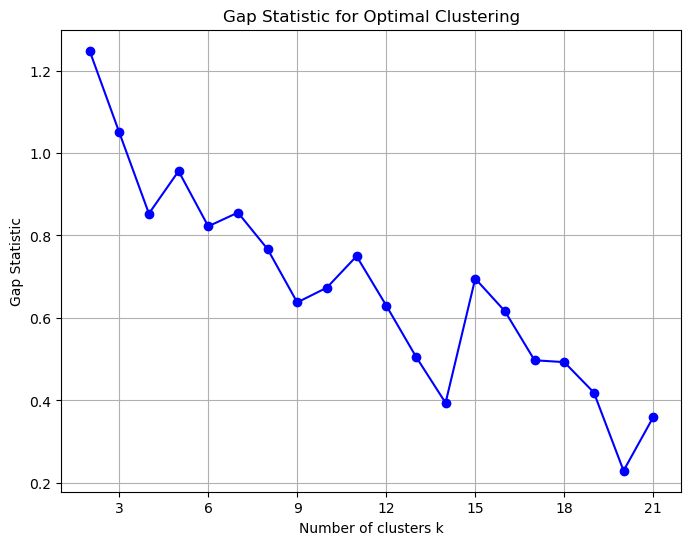

In [122]:
# Function to calculate the intra-class intertia
def calculate_inertia(data, k):
    kmeans = KMeans(init="random", n_clusters=k, n_init=20, max_iter = 300)
    kmeans.fit(data)
    return kmeans.inertia_

# Function to compute Gap Statistic
def gap_statistic(data, k_max, B=20):
    # Calculate intra-class intertia for the actual data for different values of k
    W_k = [calculate_inertia(data, k) for k in range(1, k_max + 1)]

    rows, cols = data.shape
    min_values = data.min(axis=0)  # Min values of each column
    max_values = data.max(axis=0)
    datasets = []
    for _ in range(B):
      # Generate B random datasets (uniform distribution)
      random_uniform_dataset = np.random.uniform(min_values, max_values, size=(rows, cols))
      # Find the inertia for each dataset for different values of k
      W_k_ref = [calculate_inertia(random_uniform_dataset, k) for k in range(1, k_max + 1)]
      # Find the logarith of the inertia
      log_W_k_ref = (np.log(W_k_ref))
      datasets.append(log_W_k_ref)
    # Find the mean value over the B generated datasets for different values of k
    mean_log_W_k_ref = np.mean(datasets, axis=0)
    # Compute Gap statistic
    gap = mean_log_W_k_ref - np.log(W_k)
    return gap, W_k, W_k_ref

# Call the function
k_max = 20
gap, W_k, W_k_ref = gap_statistic(gcr_num, k_max = k_max, B = 20)

# Plot Gap Statistics
plt.figure(figsize=(8, 6))
plt.plot(range(2, k_max + 2), gap, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters k')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal Clustering')
plt.grid(True)
# Set the x-axis to show only integer values
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

According to the graph, there are 2 well defined clusters. Selecting three or five clusters can also be considered, based on the interpretation that the user wants to give to clusters. The non-monotone behaviour of the graph suggests that there are smaller subclusters within larger clusters.

# 5. Clustering with Batch k-means <a name="batch_km"></a>
Instead of using the entire dataset to compute centroids, Batch K-Means uses small, randomly selected subsets (mini-batches) of the dataframe to update centroids. The algorithm iterates multiple times, and at each iteration, it updates the centroids based on a small batch of data points. Since not all data is processed, this method is suitable for large datasets. However, the optimal clustering solution may not be found.
The steps of this process are as follows:

1. The algorithm is initialized by the assigment of *k* random centroids
2. Within each iteration, a subset of the dataframe is selected (the size is decided by the user). Observations of the subset are assigned to the nearest centroid and centroids are recalculated
3. The process repeats for a specified number of iterations or until convergence criteria are met

The algorithm is implemented below. The way of implementing is the same as the normal Kmeans, below the methodology of initialising the MiniBatchKMeans is showed.

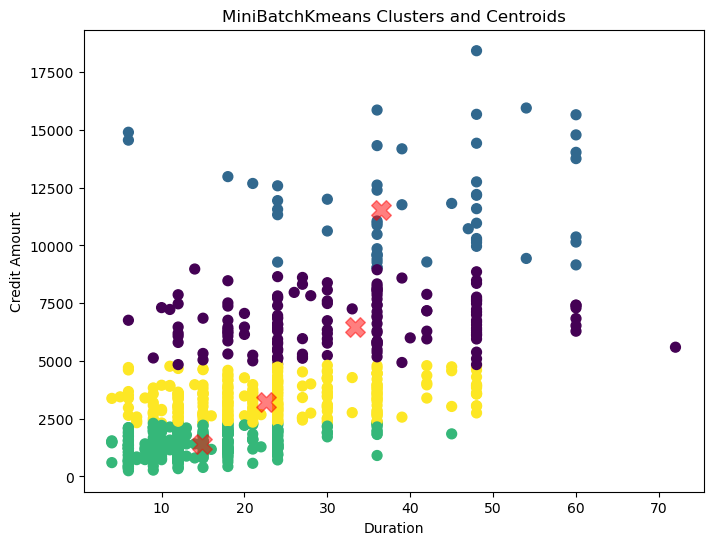

In [123]:
n_clus = 4
km = MiniBatchKMeans(init="random", n_clusters=n_clus, n_init=20, max_iter = 300, batch_size=50)

# Fit the model to the data
km.fit(gcr_num)
# Extract centroids and labels
centroids = km.cluster_centers_
labels = km.labels_
# Add cluster labels to the data
gcr_num['Cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot the data points and their cluster labels
plt.scatter(gcr_num.iloc[:, -2] , gcr_num.iloc[:, -3] , c=labels, s=50)

# Plot the centroids
plt.scatter(centroids[:, -2], centroids[:, -3], c='red', s=200, alpha=0.5, marker='X')

plt.title('MiniBatchKmeans Clusters and Centroids')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()

# 6. Fuzzy clustering <a name="fuzzy_clus"></a>
As seen in the theoretical session, fuzzy clustering generalizes the *k-means* algorithm, by allowing observations to belong to more than one cluster. This allocation is based on the the degree-of-membership matrix, which has number of rows equal to the number of clusters and number of columns equal to the number of observations of the initial dataframe.
Each element of the matrix $u_{c, i}$ represents the degree of membership of observation $i$ to cluster $c$.
The sum per row of the elements of the matrix is equal to 1. In formulas:

$$\sum_{c = 1}^{\text{nclusters}} u_{c, i} = 1 \space\space \text{for each observation i = 1, ..., n}$$

To implement this methodology in Python, function ```cmeans``` from package ```skfuzzy``` is used. It requires:

*   ```X```: the dataframe matrix
*   ```c```: the number of clusters
*   ```m```: the fuzziness parameter. This parameter indicates the degree to which an observation can belong to different clusters. When it is equal to 1, each observation is assigned to only one cluster (k-means algorithm). As its value increases, the more "fuzzy" the assigment can be
*   ```error```: the convergence criterion. The algorithm stops when the change in the membership matrix is smaller than this value
*   ```maxiter```: the maximum number of iterations allowed

In [124]:
# Apply Fuzzy clustering
n_clus = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(gcr_num.T, n_clus, m=2, error=0.005, maxiter=1000, init=None,seed=40)

This algorithm returns:


*   ```cntr```: a matrix containing the coordinates of the centroids. Each centroid is the weighted mean of observations belonging to the cluster. The membership values are used as weights
*   ```u```: the membership matrix described above
*   ```u_0```: the membership matrix of the previous iteration. It allows to track the evolution of the matrix
*   ```d```: a matrix that contains the distances between each data point and each cluster center
*   ```jm```: the weighted Euclidean distance of each observation from the cluster centers to which it belongs, with the membership matrix values as weights. As the iterations continue, its value decreases
*   ```p```: an array used to compute the distances between observations and centroids
*   ```fpc```:  the fuzzy partition coefficient (see below)

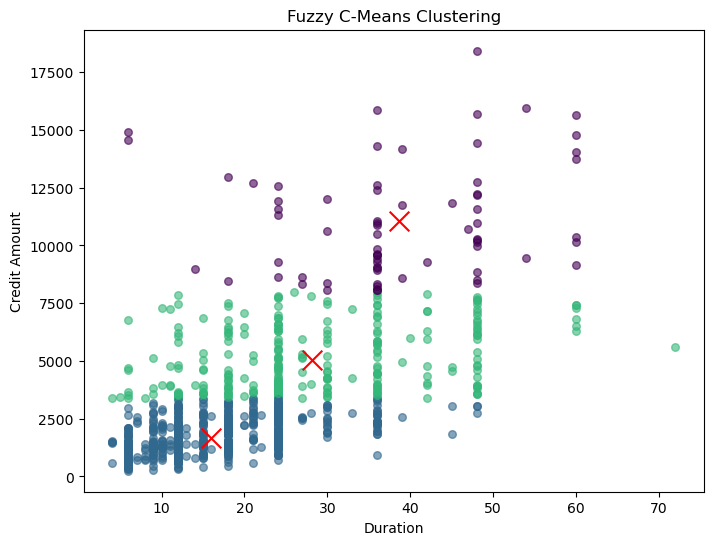

In [125]:
# Visualize the clustering
plt.figure(figsize=(8,6))

# Plot each data point colored by its highest membership
for i in range(gcr_num.shape[0]):
    plt.scatter(gcr_num.iloc[i, -2], gcr_num.iloc[i, -3], color=plt.cm.viridis(u[:, i].argmax()/n_clus), s=30, alpha=0.6)

# Plot cluster centers
plt.scatter(cntr[:, -2], cntr[:, -3], color='red', marker='x', s=200, label='Centers')

plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()

**The fuzzy partition coefficient**
<br/>The fuzzy partition coefficient is a methodology to find the optimal number of clusters used to perform a fuzzy clustering algorithm. Its values range between 0 and 1 while a higher value of this coefficient corresponds to a better description of data. In formula, it is defined as:

$$FPC = \frac{1}{n} \sum_{i = 1}^{n}\sum_{c = 1}^{\text{nclusters}} u_{c, i}^2$$

where *n* is the number of observations in the dataframe. As described above, it is one of the outputs of function ```cmeans()```.

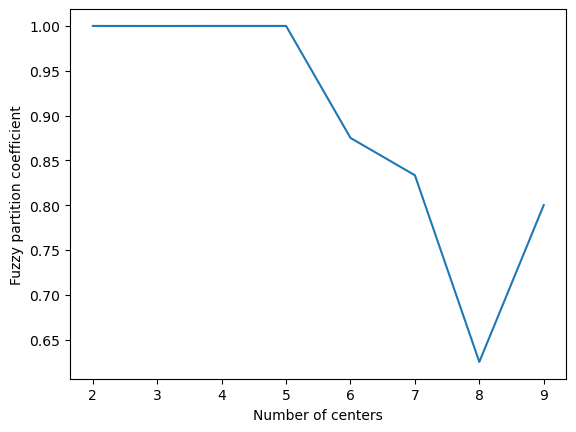

In [126]:
fpcs=[]
for ncenters in range(2, 10):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(gcr_num, ncenters , m=2, error=0.005, maxiter=1000, init=None,seed=40)

    # Store fpc values for later
    fpcs.append(fpc)

fig2, ax2 = plt.subplots()
plt.plot(np.r_[2:10], fpcs)
plt.xlabel("Number of centers")
plt.ylabel("Fuzzy partition coefficient")
plt.show()

# 7. Spectral clustering <a name="spectral_clus"></a>
As seen in the theoretical session, the Euclidean distance is not appropriate to identify convex clusters. Spectral clustering is a method based on graph theory that can overcome this shortcoming. The method can be implemented in Python using function ```SpectralClustering```, which is used in the following code. The only used parameters are the number of clusters ```n_clusters``` and the ```affinity``` parameter. The latter indicates which distance is used to calculate the Laplacian representation of a graph (see theoretical session). Additional parameters and information are detailed [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html). Below, a hypothetical application is shown where PCA is first applied to the numerical variables of the standardized dataset, followed by the clustering methodology. This is done to show that clustering can be a subsequent step to PCA.

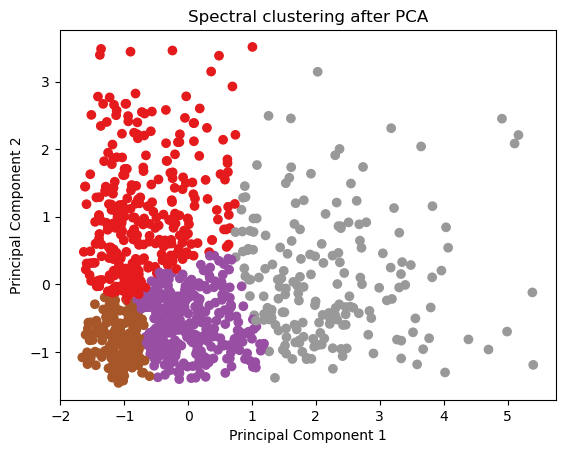

In [127]:
# Applying PCA to reduce the dimensions of the data
pca = PCA(n_components=2)
Principal_Components = pca.fit_transform(gcr_num_stand)
Principal_Components = pd.DataFrame(Principal_Components)
Principal_Components.columns = ['P1', 'P2']

# Spectral Clustering
spec_clus = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
predicted_clusters = spec_clus.fit_predict(Principal_Components)

# Visualizing the clustering
plt.scatter(Principal_Components['P1'], Principal_Components['P2'],
            c=predicted_clusters, cmap=plt.cm.Set1)

plt.title('Spectral clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Summary <a name="Summary"></a>

In this session, different clustering methods have been introduced.
 - First, the **Principal Component Analysis (PCA)** was presented. PCA's application is then extended using a Principal Component Regression (PCR). 
    
 - Secondly, the **K-means clustering** algorithm is studied. Different possibilities to determine the optimal number of clusters are provided.

 - Other clustering methods are finally briefly introduced:
    - clustering with **batch k-means**, relevant for large datasets
    - **fuzzy clustering**, where observations can be assigned to more than one cluster
    - **spectral clustering**, which allows to detect covex clusters